# Problem Statement - I

## Introduction
This assignment aims to give you an idea of applying EDA in a real business scenario. In this assignment, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

## Business Understanding
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

**The client with payment difficulties:** he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

**All other cases:** All other cases when the payment is paid on time.

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

**Approved:** The Company has approved loan Application

**Cancelled:** The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client, he received worse pricing which he did not want.

**Refused:** The company had rejected the loan (because the client does not meet their requirements etc.).

**Unused offer:**  Loan has been cancelled by the client but at different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency to default.

## Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough.

## Data Understanding

This dataset has 3 files as explained below: 

 

1 'application_data.csv'  contains all the information of the client at the time of application.
The data is about whether a **client has payment difficulties.**

 

2 'previous_application.csv' contains information about the client’s previous loan data. It contains the data on whether the previous application had been **Approved, Cancelled, Refused or Unused offer.**

 

3 'columns_description.csv' is data dictionary which describes the meaning of the variables.






#### Importing the libraries.

In [1]:
#import warnings.

import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Setting up no. of rows to dispay.
pd.options.display.max_rows = 4000000

## Loading the data sets

In [4]:
#Reading the data

inp0 = pd.read_csv("application_data.csv")
inp1 = pd.read_csv("previous_application.csv")

### Working with application_data.csv, inp0

In [5]:
#printing the shape of application_data.csv

print("application_data.csv file shape : ",  inp0.shape)

application_data.csv file shape :  (307511, 122)


In [6]:
#reading the top5 rows of the dataset to check if any extra data such as headers and column names

inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#reading the last 5 rows in the dataset to check if any extra data such as footers

inp0.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [8]:
#printing the information of columns

inp0.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [9]:
# Printing the columns description

inp0.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [10]:
# Checking the null values in the dataset

inp0.isna().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [11]:
# Checking the null values where more than 30% in the dataset 
inp0.isna().sum()[inp0.isna().sum().values > (30/100*(len(inp0.isna().sum())))]

AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
OWN_CAR_AGE                     202929
OCCUPATION_TYPE                  96391
EXT_SOURCE_1                    173378
EXT_SOURCE_2                       660
EXT_SOURCE_3                     60965
APARTMENTS_AVG                  156061
BASEMENTAREA_AVG                179943
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BUILD_AVG                 204488
COMMONAREA_AVG                  214865
ELEVATORS_AVG                   163891
ENTRANCES_AVG                   154828
FLOORSMAX_AVG                   153020
FLOORSMIN_AVG                   208642
LANDAREA_AVG                    182590
LIVINGAPARTMENTS_AVG            210199
LIVINGAREA_AVG                  154350
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAREA_AVG               169682
APARTMENTS_MODE                 156061
BASEMENTAREA_MODE               179943
YEARS_BEGINEXPLUATATION_MODE    150007
YEARS_BUILD_MODE                204488
COMMONAREA_MODE          

In [12]:
#printing the columns excluding which are more than 30% null values

null_values_cols = inp0.isna().sum()[inp0.isna().sum().values > (30/100*(len(inp0.isna().sum())))].index

len(null_values_cols)

64

In [13]:
#storing the above columns in a variable

drop_cols = ['AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE', 'OCCUPATION_TYPE',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
       'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE',
       'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR']

print(len(drop_cols))

64


In [14]:
#dropping above 64 columns from the dataset as they are more than 30% null values

inp0.drop(drop_cols, axis=1, inplace=True)

In [15]:
#Check the shape of the dataset

inp0.shape

(307511, 58)

In [16]:
#check the null values in the existing columns

inp0.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                    12
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
CNT_FAM_MEMBERS                 2
REGION_RATING_CLIENT            0
REGION_RATING_CLIENT_W_CITY     0
WEEKDAY_APPR_PROCESS_START      0
HOUR_APPR_PROC

In [17]:
#check the null values percentage in the columns

(inp0.isnull().sum()*100)/inp0.shape[0]

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000


#### Checking Datatypes

In [18]:
#Checking the number of unique values in the cols and analysing Categorical and continuous cols

inp0.nunique().sort_values()

FLAG_DOCUMENT_21                    2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL                          2
FLAG_DOCUMENT_9                     2
FLAG_DOCUMENT_20                    2
FLAG_DOCUMENT_8                     2
REG_REGION_NOT_LIVE_REGION          2
FLAG_WORK_PHONE                     2
REG_REGION_NOT_WORK_REGION          2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_7                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
LIVE_REGION_NOT_WORK_REGION         2
FLAG_DOCUMENT_4                     2
FLAG_EMP_PHONE                      2
FLAG_DOCUMENT_10                    2
TARGET                              2
NAME_CONTRACT_TYPE                  2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
FLAG_DOCUMENT_19                    2
FLAG_DOCUMEN

### Handling missing values and outliers



In [19]:
#Storing the unnecesary cols in a variable

Not_required_cols = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

print(len(Not_required_cols))

inp0.info()


33
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 

In [20]:
#Dropping the above unnecessary columns from the dataset.

inp0.drop(labels=Not_required_cols,axis=1,inplace=True)



In [21]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

In [22]:
#changing negative ages to positive ages.
inp0['DAYS_BIRTH']=abs(inp0['DAYS_BIRTH'])
inp0['DAYS_BIRTH'].describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

In [23]:
#changing negative values in days to positive days
inp0['DAYS_EMPLOYED']=abs(inp0['DAYS_EMPLOYED'])
inp0['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [24]:
#changing negative days to positive days.
inp0['DAYS_REGISTRATION']=abs(inp0['DAYS_REGISTRATION'])
inp0['DAYS_REGISTRATION'].describe()

count    307511.000000
mean       4986.120328
std        3522.886321
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.500000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64

In [25]:
#changing negative days to positive 
inp0['DAYS_ID_PUBLISH']=abs(inp0['DAYS_ID_PUBLISH'])
inp0['DAYS_ID_PUBLISH'].describe()

count    307511.000000
mean       2994.202373
std        1509.450419
min           0.000000
25%        1720.000000
50%        3254.000000
75%        4299.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [26]:
#printing top 5 values in the column AMT_ANNUITY

inp0.AMT_ANNUITY.head()

0    24700.5
1    35698.5
2     6750.0
3    29686.5
4    21865.5
Name: AMT_ANNUITY, dtype: float64

In [27]:
#checking the count of null values in the column

print("Null value count in AMT_ANNUITY: ", inp0.AMT_ANNUITY.isnull().sum())

#Checking the percentage of the null values in the column
print(60*"=")

print("Percentage of null values in AMT_ANNUITY: ", inp0.AMT_ANNUITY.isnull().sum()*100/inp0.shape[0])

Null value count in AMT_ANNUITY:  12
Percentage of null values in AMT_ANNUITY:  0.0039022994299390914


In [28]:
#Calculate mean for the AMT_ANNUITY coulumn

inp0.AMT_ANNUITY.mean()

27108.573909183444

In [29]:
#Calculate median for the AMT_ANNUITY coulumn and store it in a variable

median_inp0 = inp0.AMT_ANNUITY.median()

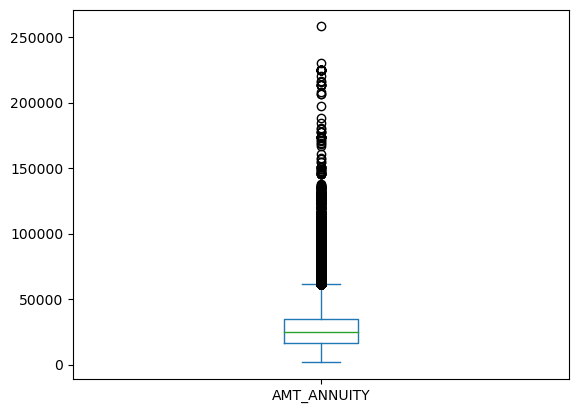

In [30]:
# plot a box plot to check the outliers in the column

inp0.AMT_ANNUITY.plot.box()
plt.show()

In [31]:
#replacing the null values with median in the AMT_ANNUITY column

inp0.loc[inp0["AMT_ANNUITY"].isna(), "AMT_ANNUITY"]= median_inp0

In [32]:
#checking the null values in the AMT_ANNUITY column

inp0.AMT_ANNUITY.isna().sum()

0

In [33]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

In [34]:
#checking the null values

inp0.isna().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
ORGANIZATION_TYPE              0
dtype: int64

## Handling coulumns

In [35]:
# Handling TARGET column
#Display value counts of column

inp0.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [36]:
# Handling NAME_CONTRACT_TYPE column
#Display value counts of column

inp0.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [37]:
# Handling CODE_GENDER column
#Display value counts of column

inp0.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

###### 'CODE_GENDER' column has some values as 'XNA' meaning Data is not available. So, can replace with them to 'F' as majority of the data has 'F' and there will be no impact to the data

In [38]:
#Printing the CODE_GENDER column where 'XNA' presents in the data

inp0[inp0.CODE_GENDER == 'XNA']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
35657,141289,0,Revolving loans,XNA,Y,Y,0,207000.0,382500.0,19125.0,...,3537,TUESDAY,10,0,0,0,0,0,0,Business Entity Type 1
38566,144669,0,Revolving loans,XNA,N,Y,2,157500.0,270000.0,13500.0,...,4659,FRIDAY,16,0,0,0,0,0,0,Industry: type 3
83382,196708,0,Revolving loans,XNA,N,Y,1,135000.0,405000.0,20250.0,...,1671,THURSDAY,15,0,0,0,0,0,0,Kindergarten
189640,319880,0,Revolving loans,XNA,Y,Y,0,247500.0,540000.0,27000.0,...,2326,FRIDAY,15,0,0,0,0,0,0,Medicine


In [39]:
#Replacing 'XNA' with 'F' in 'CODE_GENDER' column

inp0.loc[inp0.CODE_GENDER == 'XNA', "CODE_GENDER" ] = 'F'

In [40]:
#Printing value counts

inp0.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [41]:
# Handling FLAG_OWN_CAR column
#Display value counts of column

inp0.FLAG_OWN_CAR.value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [42]:
# Handling FLAG_OWN_REALTY column
#Display value counts of column

inp0.FLAG_OWN_REALTY.value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [43]:
# Handling FLAG_OWN_CAR column
#Display value counts of column

inp0.CNT_CHILDREN.value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

In [44]:
# Handling NAME_INCOME_TYPE column
#Display value counts of column

inp0.NAME_INCOME_TYPE.value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [45]:
# Handling NAME_EDUCATION_TYPE column
#Display value counts of column

inp0.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [46]:
# Handling NAME_FAMILY_STATUS column
#Display value counts of column

inp0.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [47]:
# Handling NAME_HOUSING_TYPE column
#Display value counts of column

inp0.NAME_HOUSING_TYPE.value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [48]:
# Handling WEEKDAY_APPR_PROCESS_START column
#Display value counts of column

inp0.WEEKDAY_APPR_PROCESS_START.value_counts()

TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

In [49]:
# Handling REG_REGION_NOT_LIVE_REGION column
#Display value counts of column

inp0.REG_REGION_NOT_LIVE_REGION.value_counts()

0    302854
1      4657
Name: REG_REGION_NOT_LIVE_REGION, dtype: int64

In [50]:
#changing the datatype of REG_REGION_NOT_LIVE_REGION from int to object

inp0['REG_REGION_NOT_LIVE_REGION'] = inp0['REG_REGION_NOT_LIVE_REGION'].astype(object)
inp0.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
REG_REGION_NOT_LIVE_REGION      object
REG_REGION_NOT_WORK_REGION       int64
LIVE_REGION_NOT_WORK_REGION      int64
REG_CITY_NOT_LIVE_CITY           int64
REG_CITY_NOT_WORK_CITY   

In [51]:
# Handling REG_REGION_NOT_WORK_REGION column
#Display value counts of column

inp0.REG_REGION_NOT_WORK_REGION.value_counts()

0    291899
1     15612
Name: REG_REGION_NOT_WORK_REGION, dtype: int64

In [52]:
#changing the datatype of REG_REGION_NOT_WORK_REGION from int to object

inp0['REG_REGION_NOT_WORK_REGION'] = inp0['REG_REGION_NOT_WORK_REGION'].astype(object)
inp0.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
REG_REGION_NOT_LIVE_REGION      object
REG_REGION_NOT_WORK_REGION      object
LIVE_REGION_NOT_WORK_REGION      int64
REG_CITY_NOT_LIVE_CITY           int64
REG_CITY_NOT_WORK_CITY   

In [53]:
# Handling LIVE_REGION_NOT_WORK_REGION column
#Display value counts of column

inp0.LIVE_REGION_NOT_WORK_REGION.value_counts()

0    295008
1     12503
Name: LIVE_REGION_NOT_WORK_REGION, dtype: int64

In [54]:
#changing the datatype of LIVE_REGION_NOT_WORK_REGION from int to object

inp0['LIVE_REGION_NOT_WORK_REGION'] = inp0['LIVE_REGION_NOT_WORK_REGION'].astype(object)
inp0.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
REG_REGION_NOT_LIVE_REGION      object
REG_REGION_NOT_WORK_REGION      object
LIVE_REGION_NOT_WORK_REGION     object
REG_CITY_NOT_LIVE_CITY           int64
REG_CITY_NOT_WORK_CITY   

In [55]:
# Handling REG_CITY_NOT_LIVE_CITY column
#Display value counts of column

inp0.REG_CITY_NOT_LIVE_CITY.value_counts()

0    283472
1     24039
Name: REG_CITY_NOT_LIVE_CITY, dtype: int64

In [56]:
#changing the datatype of REG_CITY_NOT_LIVE_CITY from int to object

inp0['REG_CITY_NOT_LIVE_CITY'] = inp0['REG_CITY_NOT_LIVE_CITY'].astype(object)
inp0.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
REG_REGION_NOT_LIVE_REGION      object
REG_REGION_NOT_WORK_REGION      object
LIVE_REGION_NOT_WORK_REGION     object
REG_CITY_NOT_LIVE_CITY          object
REG_CITY_NOT_WORK_CITY   

In [57]:
# Handling REG_CITY_NOT_WORK_CITY column
#Display value counts of column

inp0.REG_CITY_NOT_WORK_CITY.value_counts()

0    236644
1     70867
Name: REG_CITY_NOT_WORK_CITY, dtype: int64

In [58]:
#changing the datatype of REG_CITY_NOT_WORK_CITY from int to object

inp0['REG_CITY_NOT_WORK_CITY'] = inp0['REG_CITY_NOT_WORK_CITY'].astype(object)
inp0.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
REG_REGION_NOT_LIVE_REGION      object
REG_REGION_NOT_WORK_REGION      object
LIVE_REGION_NOT_WORK_REGION     object
REG_CITY_NOT_LIVE_CITY          object
REG_CITY_NOT_WORK_CITY   

In [59]:
# Handling LIVE_CITY_NOT_WORK_CITY column
#Display value counts of column

inp0.LIVE_CITY_NOT_WORK_CITY.value_counts()

0    252296
1     55215
Name: LIVE_CITY_NOT_WORK_CITY, dtype: int64

In [60]:
#changing the datatype of LIVE_CITY_NOT_WORK_CITY from int to object

inp0['LIVE_CITY_NOT_WORK_CITY'] = inp0['LIVE_CITY_NOT_WORK_CITY'].astype(object)
inp0.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
REG_REGION_NOT_LIVE_REGION      object
REG_REGION_NOT_WORK_REGION      object
LIVE_REGION_NOT_WORK_REGION     object
REG_CITY_NOT_LIVE_CITY          object
REG_CITY_NOT_WORK_CITY   

In [61]:
# Handling ORGANIZATION_TYPE column
#Display value counts of column

inp0.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [62]:
inp0.shape

(307511, 28)

In [63]:
#checking the percentile of 'XNA' in 'ORGANIZATION_TYPE' column
round(len(inp0[inp0.ORGANIZATION_TYPE == 'XNA'])*100/inp0.shape[0])


18

###### Since it is 18% of data missing values and not impacting to the data, dropping them from the dataset.

In [64]:
#Dropping the columns where 'XNA' presents in the ORGANIZATION_TYPE columns

inp0=inp0.drop(inp0.loc[inp0['ORGANIZATION_TYPE']=='XNA'].index)
inp0.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

In [65]:
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,291,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,2531,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,3458,THURSDAY,11,0,0,0,0,1,1,Religion


In [66]:
inp0.shape

(252137, 28)

In [67]:
inp0.AMT_CREDIT.describe()

count    2.521370e+05
mean     6.113985e+05
std      4.065272e+05
min      4.500000e+04
25%      2.779695e+05
50%      5.212800e+05
75%      8.292240e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

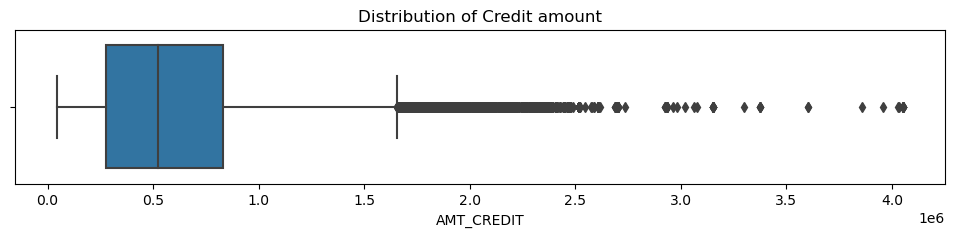

In [68]:
#plot a box plot for DAYS_BIRTH

plt.figure(figsize=(12,2))
sns.boxplot(inp0.AMT_CREDIT)
plt.title('Distribution of Credit amount')
plt.show()

In [69]:
#Findout the quantile([0.5, 0.7, 0.9,0.95,0.99,1]) of AMT_CREDIT

inp0.AMT_CREDIT.quantile([0.5, 0.7, 0.9,0.95,0.99,1])

0.50     521280.0
0.70     757413.0
0.90    1170000.0
0.95    1350000.0
0.99    1886850.0
1.00    4050000.0
Name: AMT_CREDIT, dtype: float64

There are outliers after 99% and the amount is vary from the person to person.

In [70]:
inp0.DAYS_BIRTH.describe()

count    252137.000000
mean      14769.133174
std        3662.573769
min        7489.000000
25%       11775.000000
50%       14573.000000
75%       17563.000000
max       25200.000000
Name: DAYS_BIRTH, dtype: float64

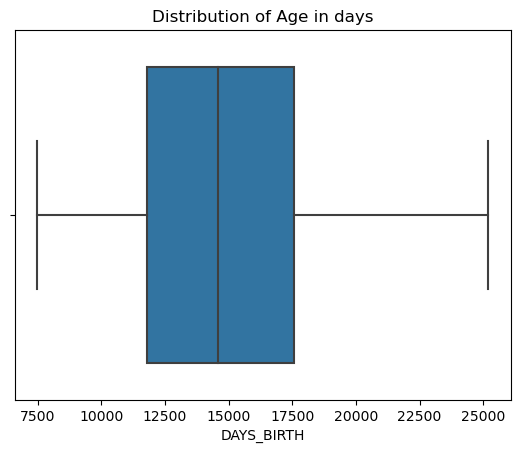

In [71]:
#plot a box plot for DAYS_BIRTH

sns.boxplot(inp0.DAYS_BIRTH)
plt.title('Distribution of Age in days')
plt.show()

There are no outliers in DAYS_BIRTH column and almost no difference between mean and median. Almost same age group of customers

In [72]:
inp0.DAYS_EMPLOYED.describe()

count    252137.000000
mean       2384.169325
std        2338.360162
min           0.000000
25%         767.000000
50%        1648.000000
75%        3175.000000
max       17912.000000
Name: DAYS_EMPLOYED, dtype: float64

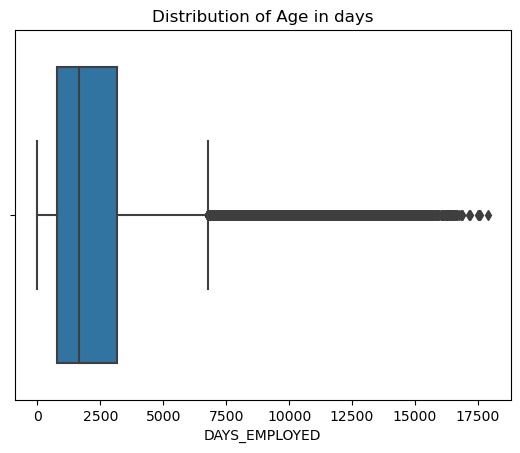

In [73]:
#plot a box plot for DAYS_EMPLOYED

sns.boxplot(inp0.DAYS_EMPLOYED)
plt.title('Distribution of Age in days')
plt.show()

In [74]:
#Creating bins for AMT_CREDIT

bins = [0,350000,700000,1000000000]
slots = ['Low','Medium','High']

inp0['AMT_CREDIT_RANGE']=pd.cut(inp0['AMT_CREDIT'],bins=bins,labels=slots)

In [75]:
# Creating bins for income amount

bins = [0,200000,400000,10000000000]
slot = ['Low','Medium','High']

inp0['AMT_INCOME_RANGE']=pd.cut(inp0['AMT_INCOME_TOTAL'],bins,labels=slot)

In [76]:
# Creating bins for days_birth

bins = [0,7300,10950,14600,18250,21900,25500]
slot = ['0-20','20-30','30-40','40-50','50-60','60-70']

inp0['AGE_RANGE']=pd.cut(inp0['DAYS_BIRTH'],bins,labels=slot)

In [77]:
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,AGE_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,Business Entity Type 3,Medium,Medium,20-30
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,School,High,Medium,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,Government,Low,Low,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,Business Entity Type 3,Low,Low,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,1,1,Religion,Medium,Low,50-60


### Analyzing the application_data dataset

In [78]:
#Checking the percentage of Target column to findout the customers having difficulties in the re-pay and no-deficulty customers

round(inp0.TARGET.value_counts()*100/len(inp0),2)

0    91.34
1     8.66
Name: TARGET, dtype: float64

Which means 8.66% of customers having difficulties in re-pay the loan and 91.34% customers are re-paying the loan

In [79]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)
target_1 = inp0[inp0['TARGET']==1]
target_0 = inp0[inp0['TARGET']==0]

In [80]:
target_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,AGE_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,Business Entity Type 3,Medium,Medium,20-30
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0,0,0,0,0,0,Business Entity Type 3,High,Low,50-60
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0,0,0,0,0,0,Business Entity Type 3,High,Medium,40-50
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,0,0,0,0,0,0,Self-employed,Low,Low,30-40
94,100112,1,Cash loans,M,Y,Y,0,315000.0,953460.0,64107.0,...,0,0,0,0,1,1,Industry: type 4,High,Medium,20-30


In [81]:
target_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,AGE_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,School,High,Medium,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,Government,Low,Low,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,Business Entity Type 3,Low,Low,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,1,1,Religion,Medium,Low,50-60
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0,0,Other,Medium,Low,40-50


### Univariate Analysis for target =0 and target=1

##### Age column

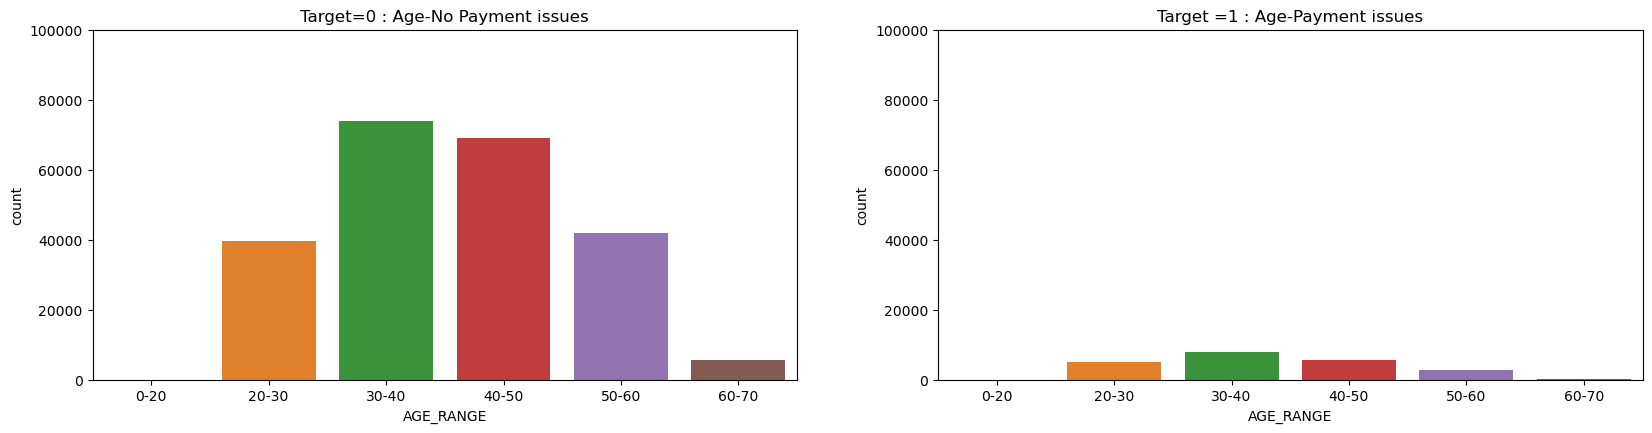

In [82]:
# Numeric variable analysis for target_0 & target_1 dataframe

plt.figure(figsize = (20, 10))
plt.subplot(2, 2, 1)
plt.ylim(0,100000)
plt.title('Target=0 : Age-No Payment issues')
sns.countplot(target_0['AGE_RANGE'])

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Target =1 : Age-Payment issues')
plt.ylim(0,100000)
sns.countplot(target_1['AGE_RANGE'])
plt.show()

We can target the customers age range 30-60 while giving loans as they are able to repay loan ontime

##### Amount credit range

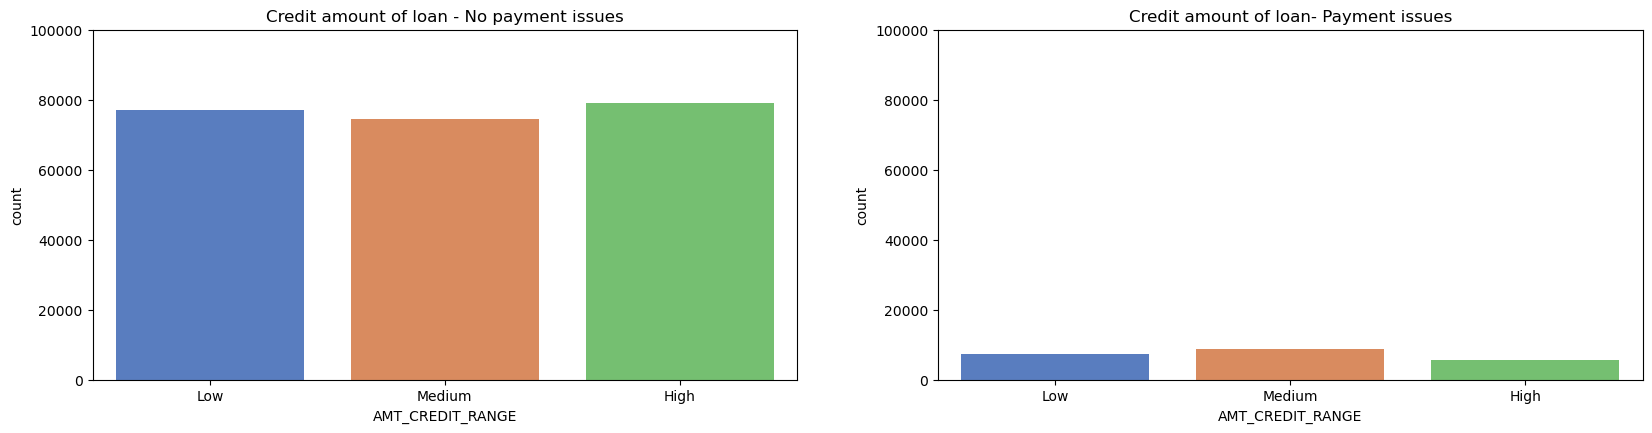

In [83]:
# Numeric variable analysis for target_0 & target_1 dataframe
plt.figure(figsize = (20, 10))
plt.subplot(2, 2, 1)
plt.ylim(0,100000)
plt.title('Credit amount of loan - No payment issues')
sns.countplot(target_0['AMT_CREDIT_RANGE'],palette='muted')

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Credit amount of loan- Payment issues')
plt.ylim(0,100000)
sns.countplot(target_1['AMT_CREDIT_RANGE'], palette='muted')
plt.show()



Customers with less credit are most likely to make payment. Customers having medium and high credit can also be considered to provide loans


##### NAME_INCOME_TYPE

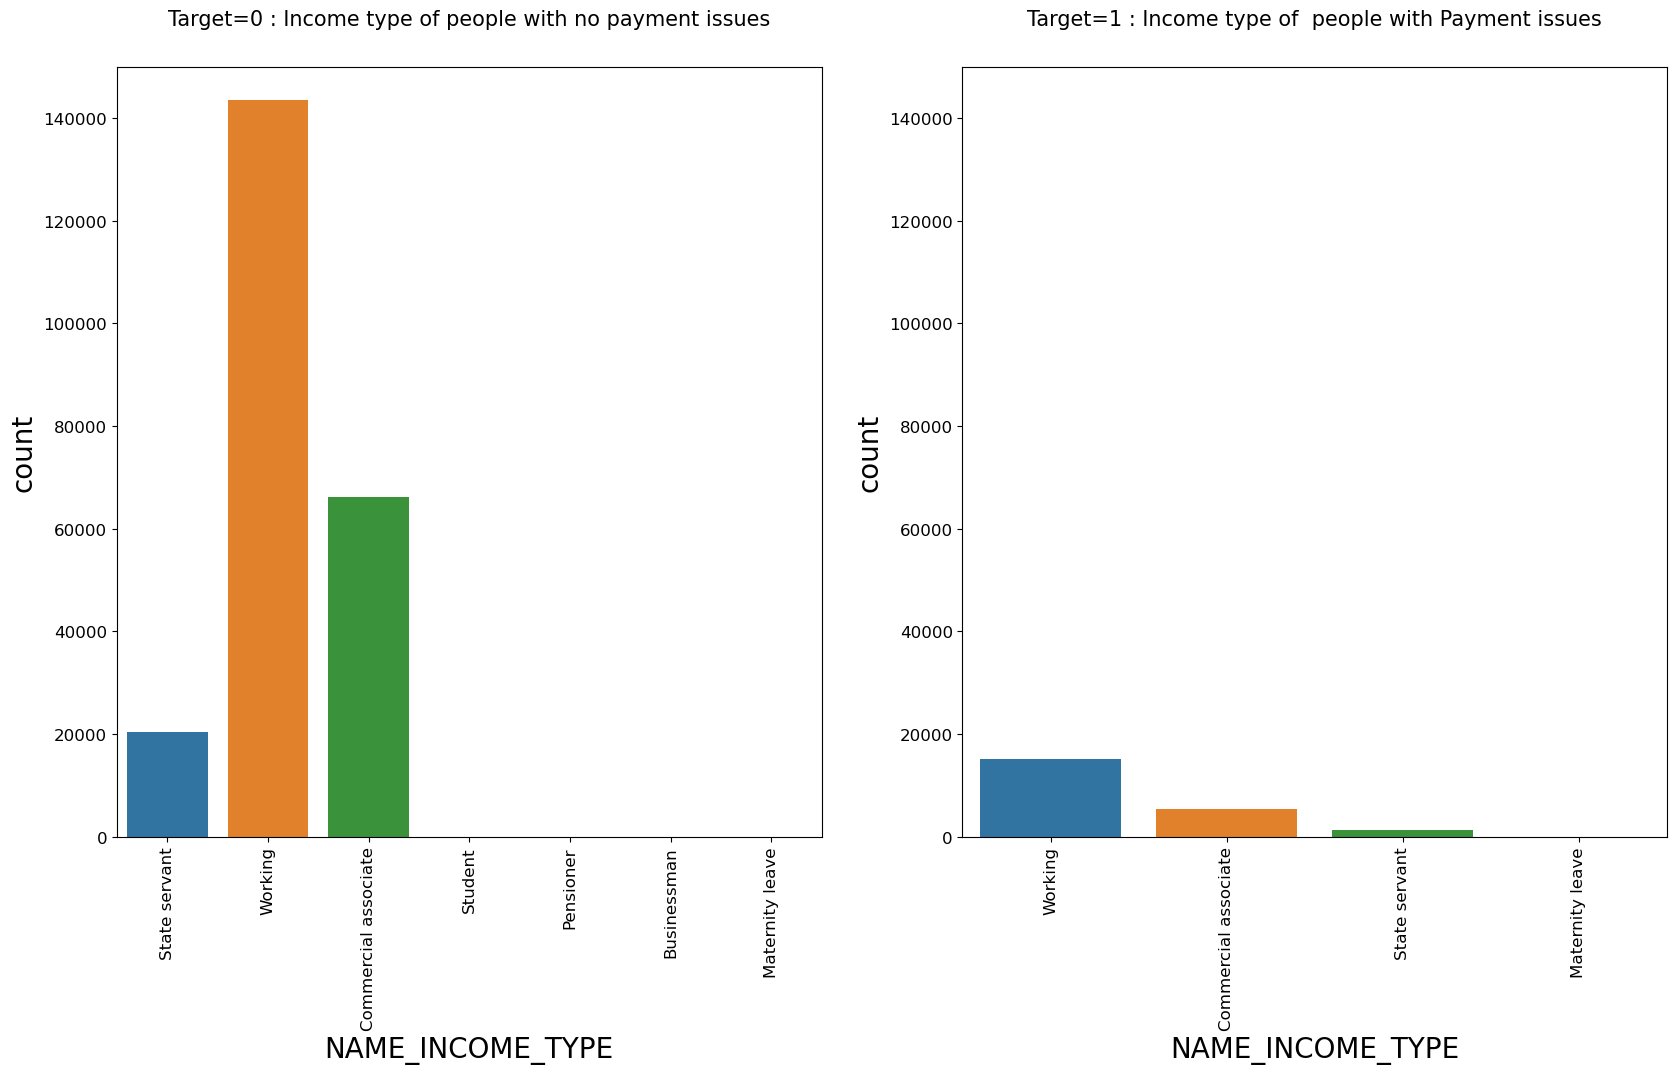

In [84]:
# Categorical variable analysis for target_0 & target_1 dataframe
plt.figure(figsize = (20, 10))
plt.rcParams['axes.titlesize'] = 15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlepad'] = 30
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)
plt.subplot(1, 2, 1)
#plt.title()
sns.countplot(target_0['NAME_INCOME_TYPE'].dropna())
plt.title('Target=0 : Income type of people with no payment issues')
plt.ylim(0,150000)
plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)

sns.countplot(target_1['NAME_INCOME_TYPE'].dropna())
plt.title('Target=1 : Income type of  people with Payment issues')
plt.ylim(0,150000)
plt.xticks(rotation = 90)
plt.show()

##### AMT_CREDIT

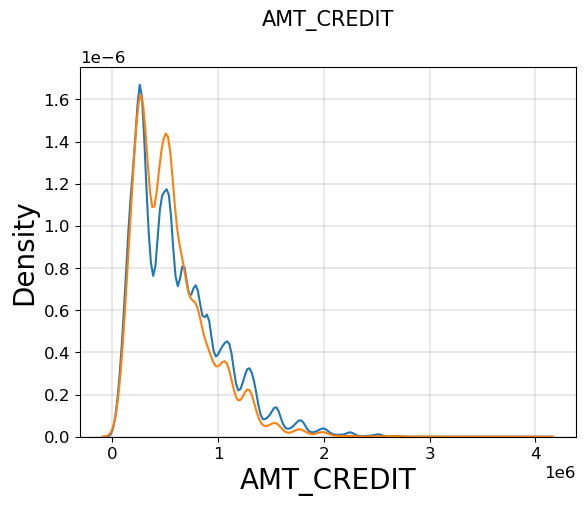

In [85]:
#Analyse continuous column with respect to the target column
sns.distplot(target_0['AMT_CREDIT'], hist = False, label="Good")# Target = 0
sns.distplot(target_1['AMT_CREDIT'], hist = False, label='Bad')# Taget = 1
plt.title('AMT_CREDIT')
plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5) 
plt.show()

###### AMT_ANNUITY

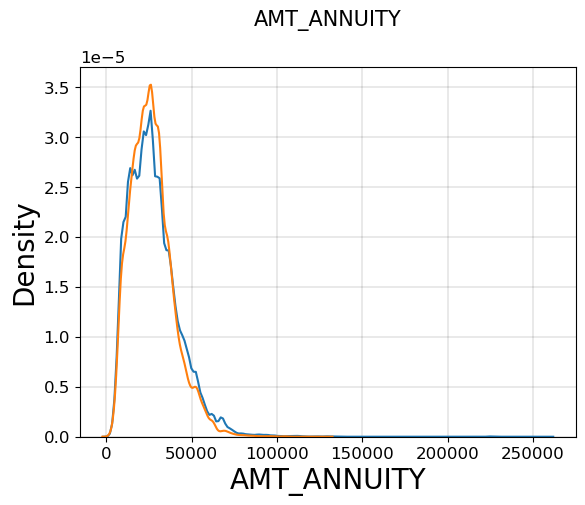

In [86]:
#Analyse continuous column with respect to the target column
sns.distplot(target_0['AMT_ANNUITY'], hist = False, label="Good") # Target = 0
sns.distplot(target_1['AMT_ANNUITY'], hist = False, label="Bad") # Taget = 1
plt.title('AMT_ANNUITY')
plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5) 
plt.show()

In [87]:
#Plot mutiple categorical columns with respect to Target column: Subplot
features = ['CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
            'NAME_HOUSING_TYPE']
list(enumerate(features))

[(0, 'CODE_GENDER'),
 (1, 'NAME_INCOME_TYPE'),
 (2, 'NAME_EDUCATION_TYPE'),
 (3, 'NAME_FAMILY_STATUS'),
 (4, 'NAME_HOUSING_TYPE')]

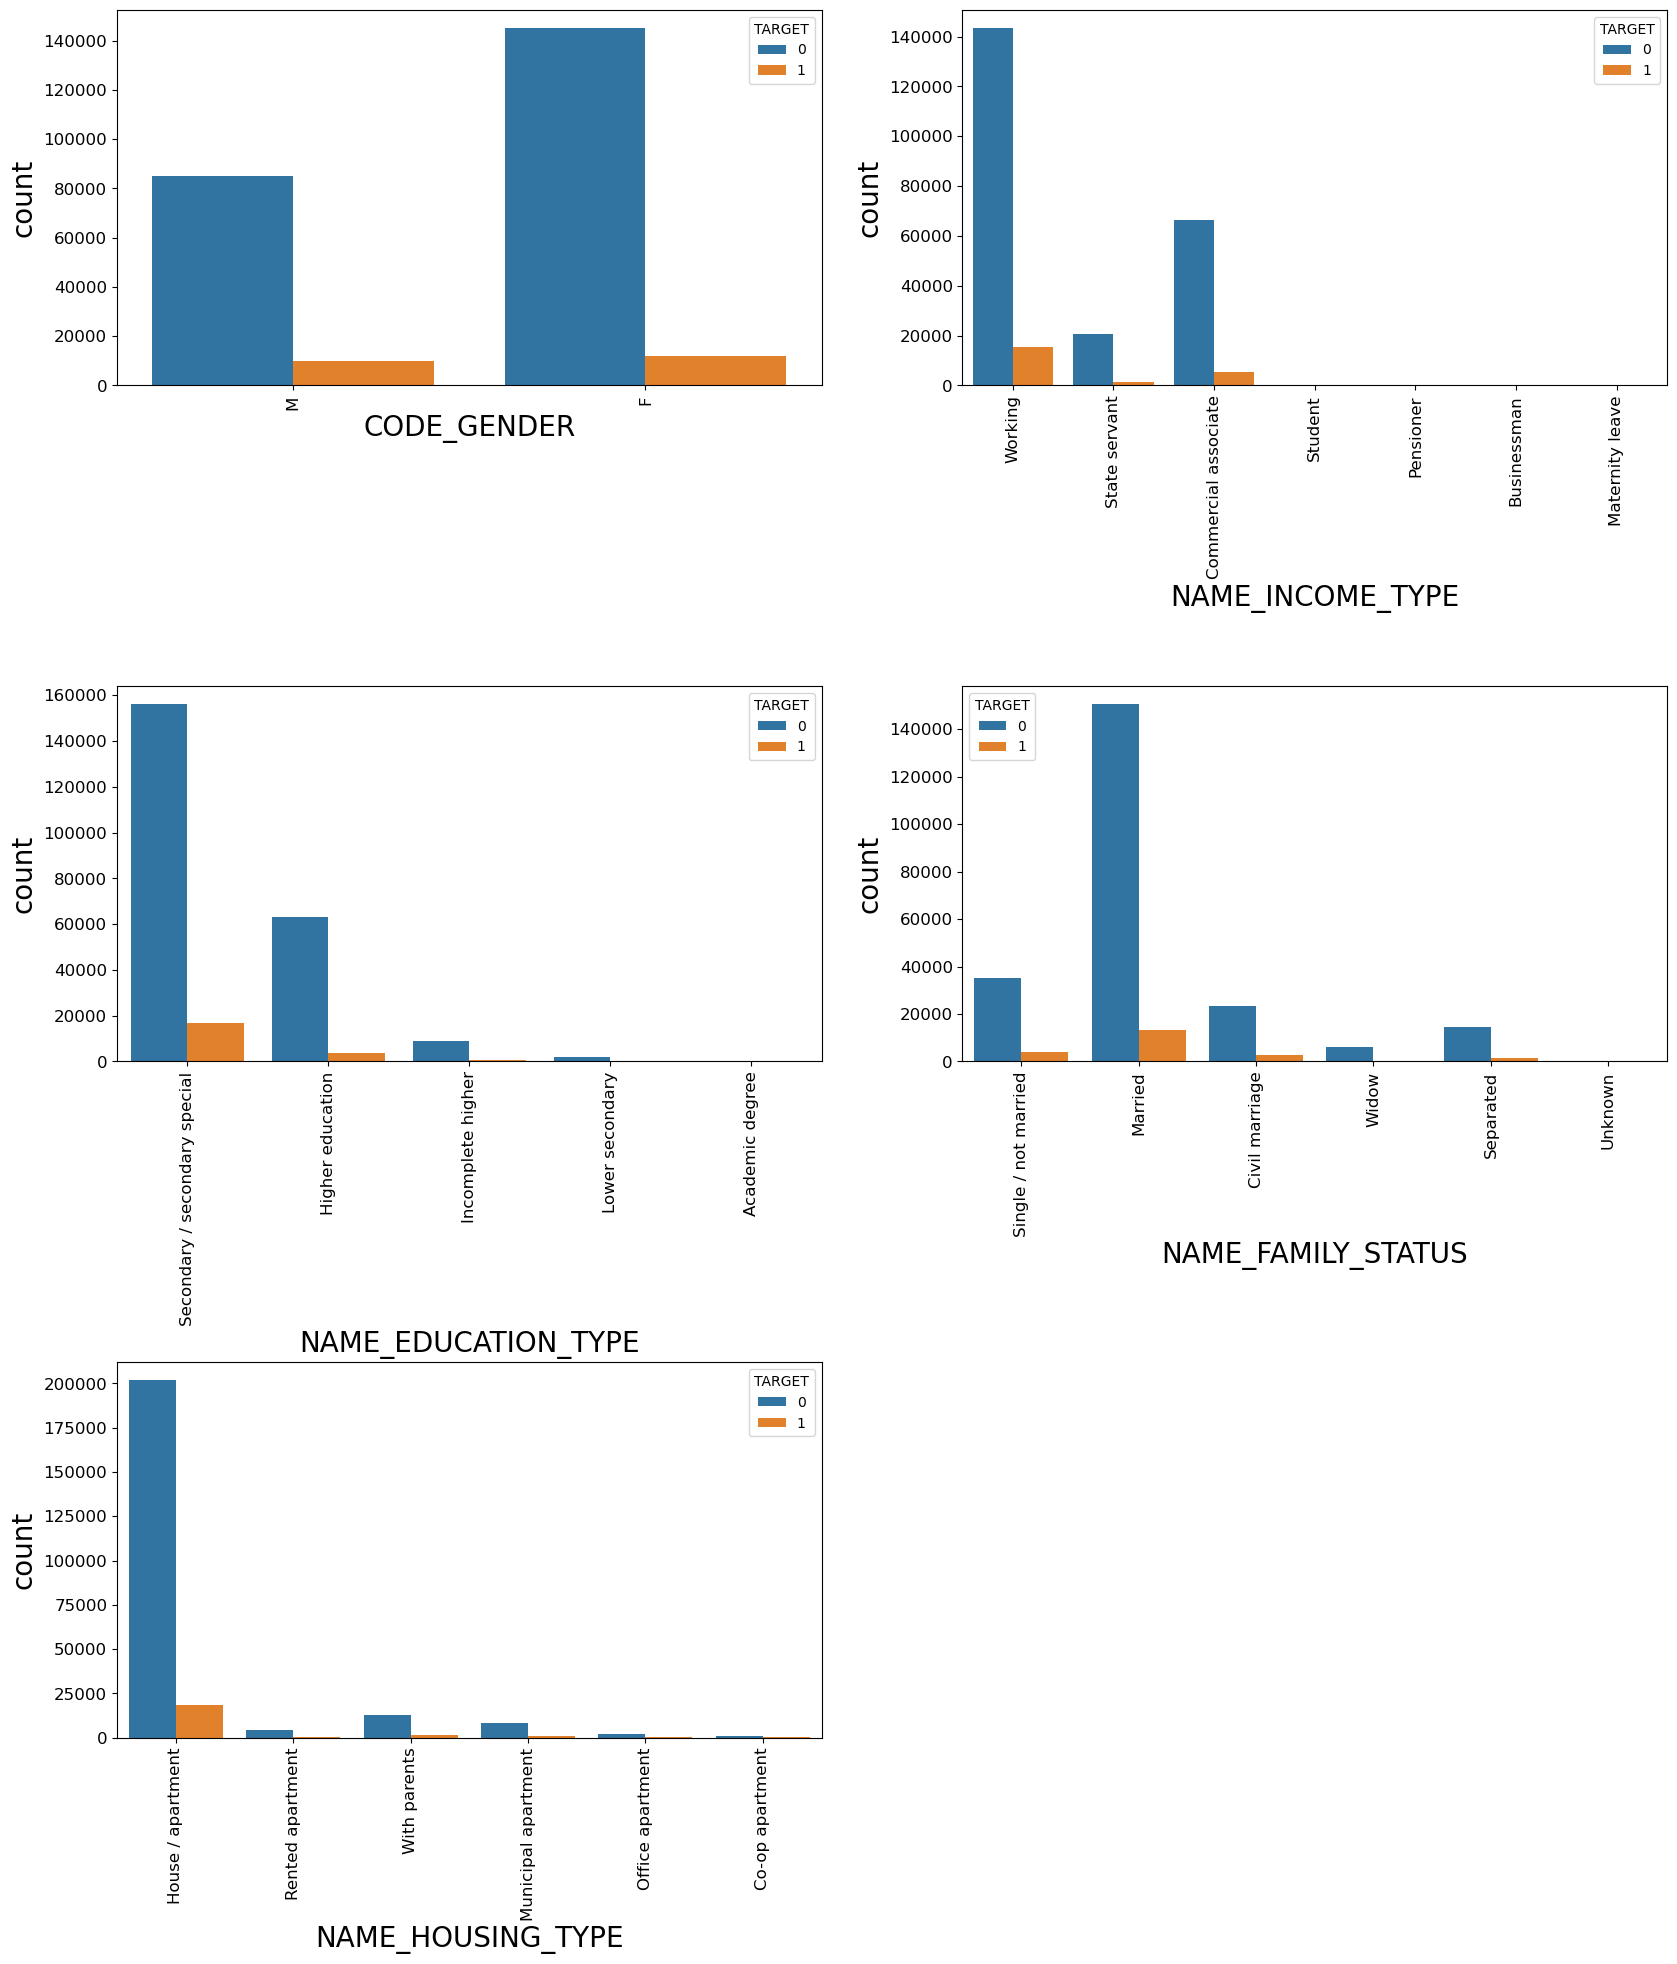

In [88]:
plt.figure(figsize = (20, 40))

plt.subplots_adjust(hspace=0.8)
for i in enumerate(features):
    plt.subplot(5, 2, i[0]+1)
    sns.countplot(x = i[1], hue = 'TARGET', data = inp0)
    plt.xticks(rotation = 90)

#### From the above plots we can see the following,

  1.  Female customers are re-paying loan amount on time and banks can target more female customers for lending loan.
  2.  Working customers can be targetted to lend loans as they have higher percentage of making payments on time.
  3.  Customers with secondary education are most likely to make payments when compared to customers with academic degree.
  4.  Married customers have paid loan amount on time when compared to widows.
  5. Customers owning House/apartment are most likely to make payments on time compared to those living in CO-OP apartment.

### Correlation Matrix

In [89]:
#correlation matrix for all numerical columns
corr=target_0.corr()
corr

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START
SK_ID_CURR,1.000000,NaN,-0.000484,0.001415,-0.000777,-0.001179,-0.000094,0.001016,0.000005,-0.000269,-0.000202,-0.000275
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.000484,NaN,1.000000,-0.009826,-0.018704,-0.007612,-0.030352,-0.242462,-0.063036,-0.162900,0.117746,-0.033031
AMT_INCOME_TOTAL,0.001415,NaN,-0.009826,1.000000,0.326155,0.400752,0.169306,0.045543,0.030102,-0.034508,0.026462,0.055934
AMT_CREDIT,-0.000777,NaN,-0.018704,0.326155,1.000000,0.762103,0.103876,0.152659,0.087500,0.015180,0.034914,0.040390
AMT_ANNUITY,-0.001179,NaN,-0.007612,0.400752,0.762103,1.000000,0.122206,0.091571,0.052470,-0.009814,0.025990,0.034038
REGION_POPULATION_RELATIVE,-0.000094,NaN,-0.030352,0.169306,0.103876,0.122206,1.000000,0.041138,-0.008663,0.059696,0.004014,0.174754
DAYS_BIRTH,0.001016,NaN,-0.242462,0.045543,0.152659,0.091571,0.041138,1.000000,0.352662,0.299000,0.108050,-0.048619
DAYS_EMPLOYED,0.000005,NaN,-0.063036,0.030102,0.087500,0.052470,-0.008663,0.352662,1.000000,0.172102,0.086679,-0.022200
DAYS_REGISTRATION,-0.000269,NaN,-0.162900,-0.034508,0.015180,-0.009814,0.059696,0.299000,0.172102,1.000000,0.029895,0.031501


To get rid of the repeated correlation values between two variables we perform the following steps

In [90]:
#Convert the diagonal and below diagonal values of matrix to False, Whereever False is there is replaced with NaN on execution
corr=corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START
SK_ID_CURR,NaN,NaN,-0.000484,0.001415,-0.000777,-0.001179,-0.000094,0.001016,0.000005,-0.000269,-0.000202,-0.000275
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,NaN,NaN,NaN,-0.009826,-0.018704,-0.007612,-0.030352,-0.242462,-0.063036,-0.162900,0.117746,-0.033031
AMT_INCOME_TOTAL,NaN,NaN,NaN,NaN,0.326155,0.400752,0.169306,0.045543,0.030102,-0.034508,0.026462,0.055934
AMT_CREDIT,NaN,NaN,NaN,NaN,NaN,0.762103,0.103876,0.152659,0.087500,0.015180,0.034914,0.040390
AMT_ANNUITY,NaN,NaN,NaN,NaN,NaN,NaN,0.122206,0.091571,0.052470,-0.009814,0.025990,0.034038
REGION_POPULATION_RELATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.041138,-0.008663,0.059696,0.004014,0.174754
DAYS_BIRTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.352662,0.299000,0.108050,-0.048619
DAYS_EMPLOYED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.172102,0.086679,-0.022200
DAYS_REGISTRATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.029895,0.031501


In [91]:
#convert it to dataframe
corrdf = corr.unstack().reset_index()
corrdf.head()

,level_0,level_1,0
0,SK_ID_CURR,SK_ID_CURR,NaN
1,SK_ID_CURR,TARGET,NaN
2,SK_ID_CURR,CNT_CHILDREN,NaN
3,SK_ID_CURR,AMT_INCOME_TOTAL,NaN
4,SK_ID_CURR,AMT_CREDIT,NaN


In [92]:
#Changing the names of columns
corrdf.columns=['VAR1','VAR2','Correlation']
corrdf.head()

,VAR1,VAR2,Correlation
0,SK_ID_CURR,SK_ID_CURR,NaN
1,SK_ID_CURR,TARGET,NaN
2,SK_ID_CURR,CNT_CHILDREN,NaN
3,SK_ID_CURR,AMT_INCOME_TOTAL,NaN
4,SK_ID_CURR,AMT_CREDIT,NaN


In [93]:
#Drop the columns having the missing data
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf.head()

,VAR1,VAR2,Correlation
24,CNT_CHILDREN,SK_ID_CURR,-0.000484
36,AMT_INCOME_TOTAL,SK_ID_CURR,0.001415
38,AMT_INCOME_TOTAL,CNT_CHILDREN,-0.009826
48,AMT_CREDIT,SK_ID_CURR,-0.000777
50,AMT_CREDIT,CNT_CHILDREN,-0.018704


In [94]:
#Round off the values
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf.head()

,VAR1,VAR2,Correlation
24,CNT_CHILDREN,SK_ID_CURR,-0.00
36,AMT_INCOME_TOTAL,SK_ID_CURR,0.00
38,AMT_INCOME_TOTAL,CNT_CHILDREN,-0.01
48,AMT_CREDIT,SK_ID_CURR,-0.00
50,AMT_CREDIT,CNT_CHILDREN,-0.02


In [95]:
#converting correlation into absolute value

corrdf['Correlation'] = corrdf['Correlation'].abs()
corrdf.head()

,VAR1,VAR2,Correlation
24,CNT_CHILDREN,SK_ID_CURR,0.00
36,AMT_INCOME_TOTAL,SK_ID_CURR,0.00
38,AMT_INCOME_TOTAL,CNT_CHILDREN,0.01
48,AMT_CREDIT,SK_ID_CURR,0.00
50,AMT_CREDIT,CNT_CHILDREN,0.02


In [96]:
#Sorting the correlation values
corrdf.sort_values(by = 'Correlation', ascending = False).head(15)

,VAR1,VAR2,Correlation
64,AMT_ANNUITY,AMT_CREDIT,0.76
63,AMT_ANNUITY,AMT_INCOME_TOTAL,0.40
103,DAYS_EMPLOYED,DAYS_BIRTH,0.35
51,AMT_CREDIT,AMT_INCOME_TOTAL,0.33
115,DAYS_REGISTRATION,DAYS_BIRTH,0.30
86,DAYS_BIRTH,CNT_CHILDREN,0.24
116,DAYS_REGISTRATION,DAYS_EMPLOYED,0.17
138,HOUR_APPR_PROCESS_START,REGION_POPULATION_RELATIVE,0.17
75,REGION_POPULATION_RELATIVE,AMT_INCOME_TOTAL,0.17
110,DAYS_REGISTRATION,CNT_CHILDREN,0.16


In [97]:
#For target_1 dataframe we perform the same operations to find correlation
corr = target_1.corr()

corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf = corr.unstack().reset_index()
corrdf.columns = ['VAR1', 'VAR2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
# Since we see correlation as an absolute value, we are converting it into absolute valucorrdf['Correlation_abs'] = corrdf0['Correlation'].abs()
corrdf.sort_values(by = 'Correlation', ascending = False).head(15)

,VAR1,VAR2,Correlation
64,AMT_ANNUITY,AMT_CREDIT,0.75
103,DAYS_EMPLOYED,DAYS_BIRTH,0.31
115,DAYS_REGISTRATION,DAYS_BIRTH,0.24
88,DAYS_BIRTH,AMT_CREDIT,0.19
127,DAYS_ID_PUBLISH,DAYS_BIRTH,0.14
116,DAYS_REGISTRATION,DAYS_EMPLOYED,0.14
138,HOUR_APPR_PROCESS_START,REGION_POPULATION_RELATIVE,0.14
100,DAYS_EMPLOYED,AMT_CREDIT,0.11
128,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.10
122,DAYS_ID_PUBLISH,CNT_CHILDREN,0.09


#### Bivariate Analysis for target 0 and target 1

There are three ways to analyse the numeric- numeric data types simultaneously. 

1. Scatter plot: describes the pattern that how one variable is varying with other variable. 
2. Correlation matrix: to describe the linearity of two numeric variables. 
3. Pair plot: group of scatter plots of all numeric variables in the data frame

###### Income vs Credit

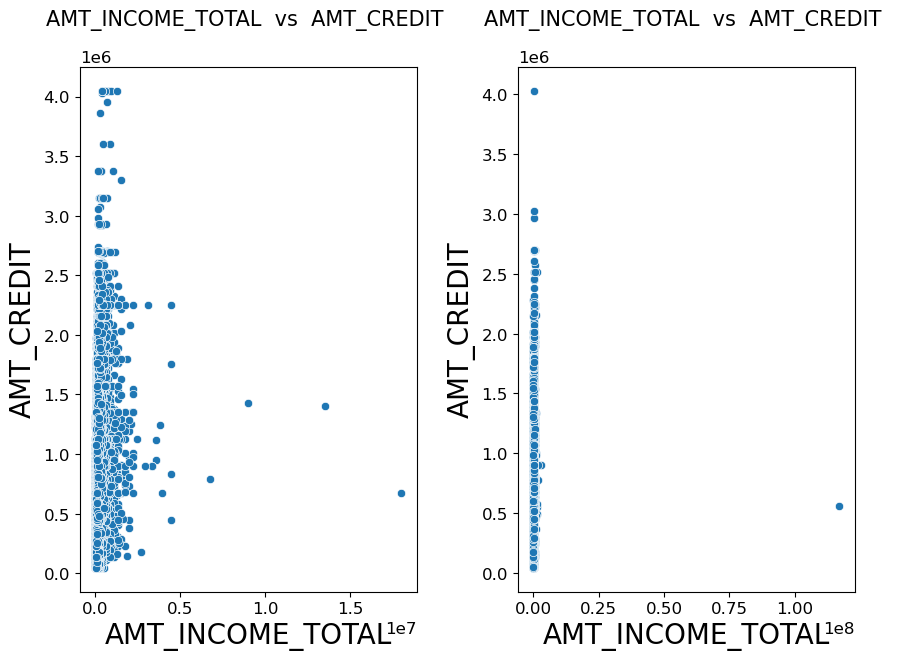

In [98]:
#Scatter plot for numeric columns

plt.figure(figsize = (10, 15))
plt.subplots_adjust(wspace=0.3)


plt.subplot(2,2,1)
sns.scatterplot(target_0.AMT_INCOME_TOTAL,target_0.AMT_CREDIT)
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_INCOME_TOTAL  vs  AMT_CREDIT ')

plt.subplot(2,2,2)
sns.scatterplot(target_1.AMT_INCOME_TOTAL,target_1.AMT_CREDIT)
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_INCOME_TOTAL  vs  AMT_CREDIT ')

plt.show()

###### Those who have paid the loan amount on/within time are more likely to get higher credits than those who didnt pay/did late payments.

Numerical categorical analysis


Income range vs Gender

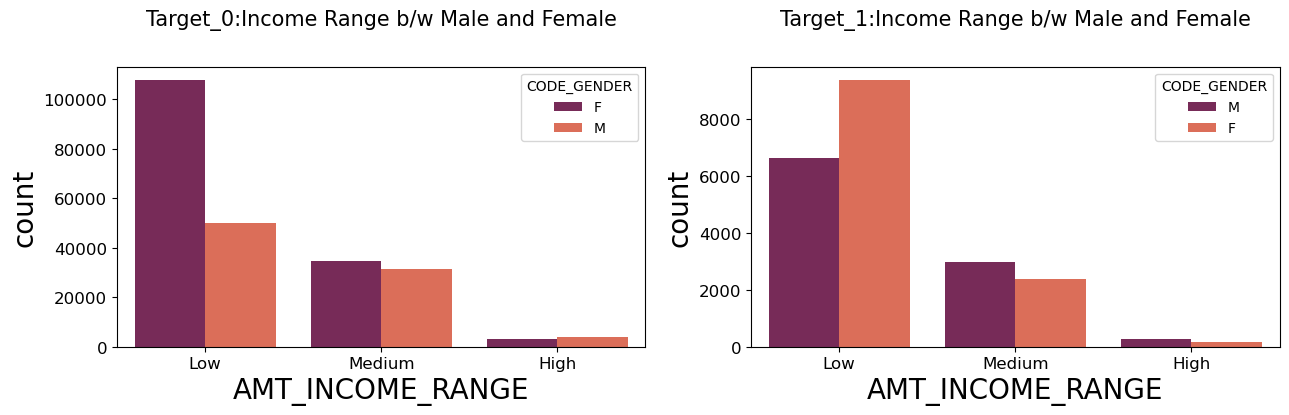

In [99]:
# Numeric variable analysis for target_0 & target_1 dataframe
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.title('Target_0:Income Range b/w Male and Female')

sns.countplot(x='AMT_INCOME_RANGE', hue='CODE_GENDER', data=target_0, palette='rocket')

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Target_1:Income Range b/w Male and Female')

sns.countplot(x='AMT_INCOME_RANGE', hue='CODE_GENDER', data=target_1,palette='rocket')
plt.show()

We can see that Females with low income don’t have any payment issues.


##### Credit amount vs Education Status

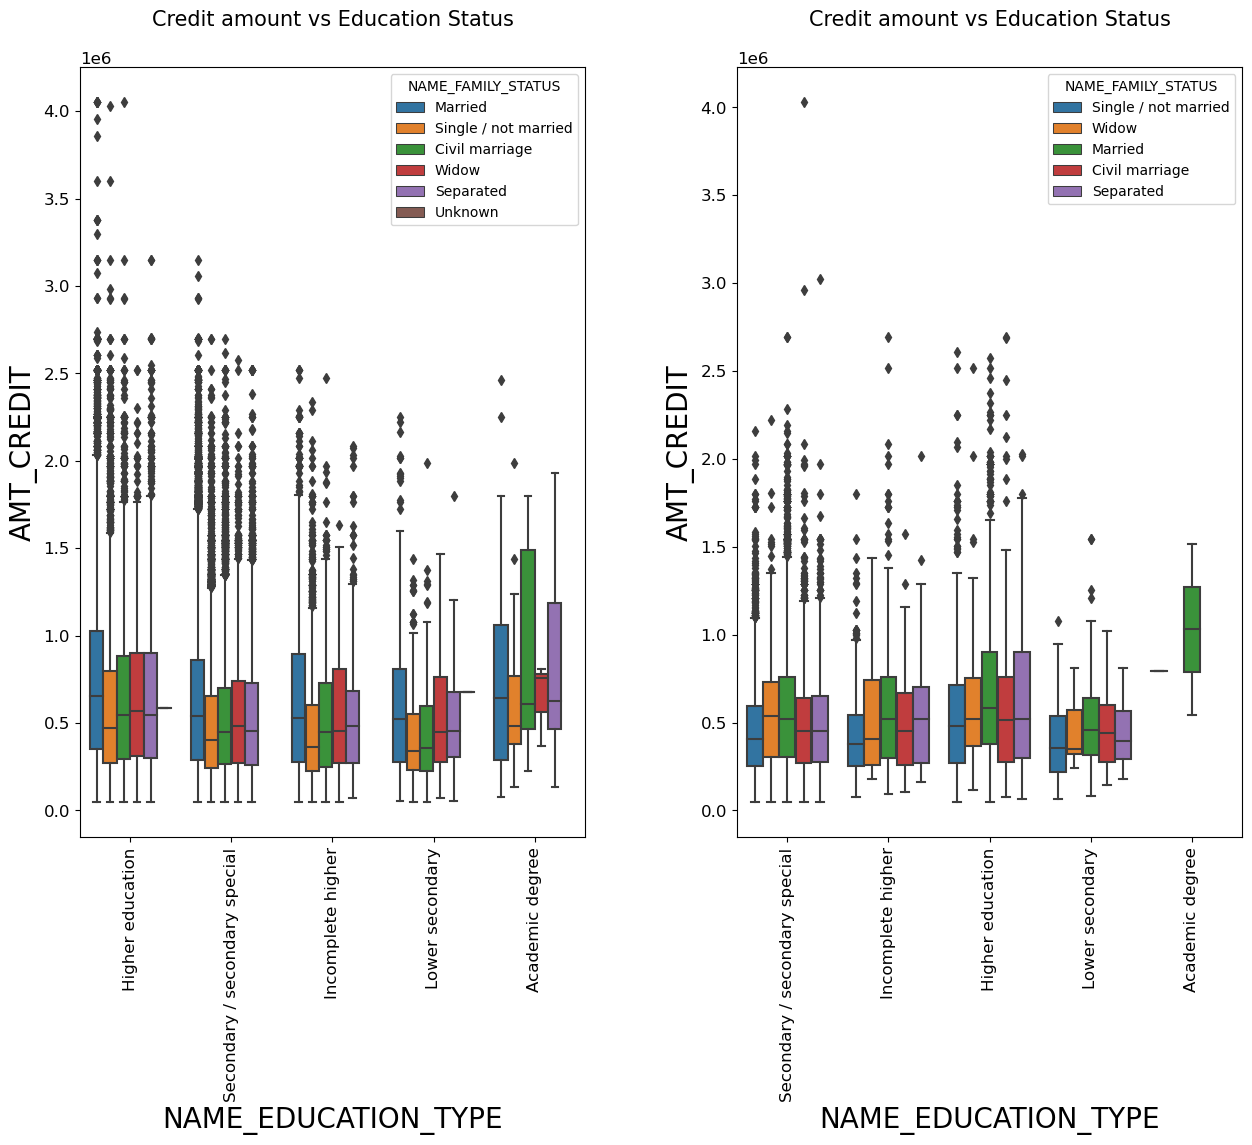

In [100]:
# Box plotting for Credit amount

plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.3)

plt.subplot(121)
sns.boxplot(data =target_0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v]')
plt.title('Credit amount vs Education Status')
plt.xticks(rotation=90)

plt.subplot(122)
sns.boxplot(data =target_1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v]')
plt.title('Credit amount vs Education Status')
plt.xticks(rotation=90)
plt.show()


###### From the above plot,we can see that
1. Some of the highly educated, married person are having credits higher than those who have done lower secondary education.
2. Those with higher education have higher credits and are more likely to make payments on time.
3. More number of outliers are seen in higher education.
4. The people with secondary/secondary special education are less likely to make payments on time.

#### Income vs Education Status

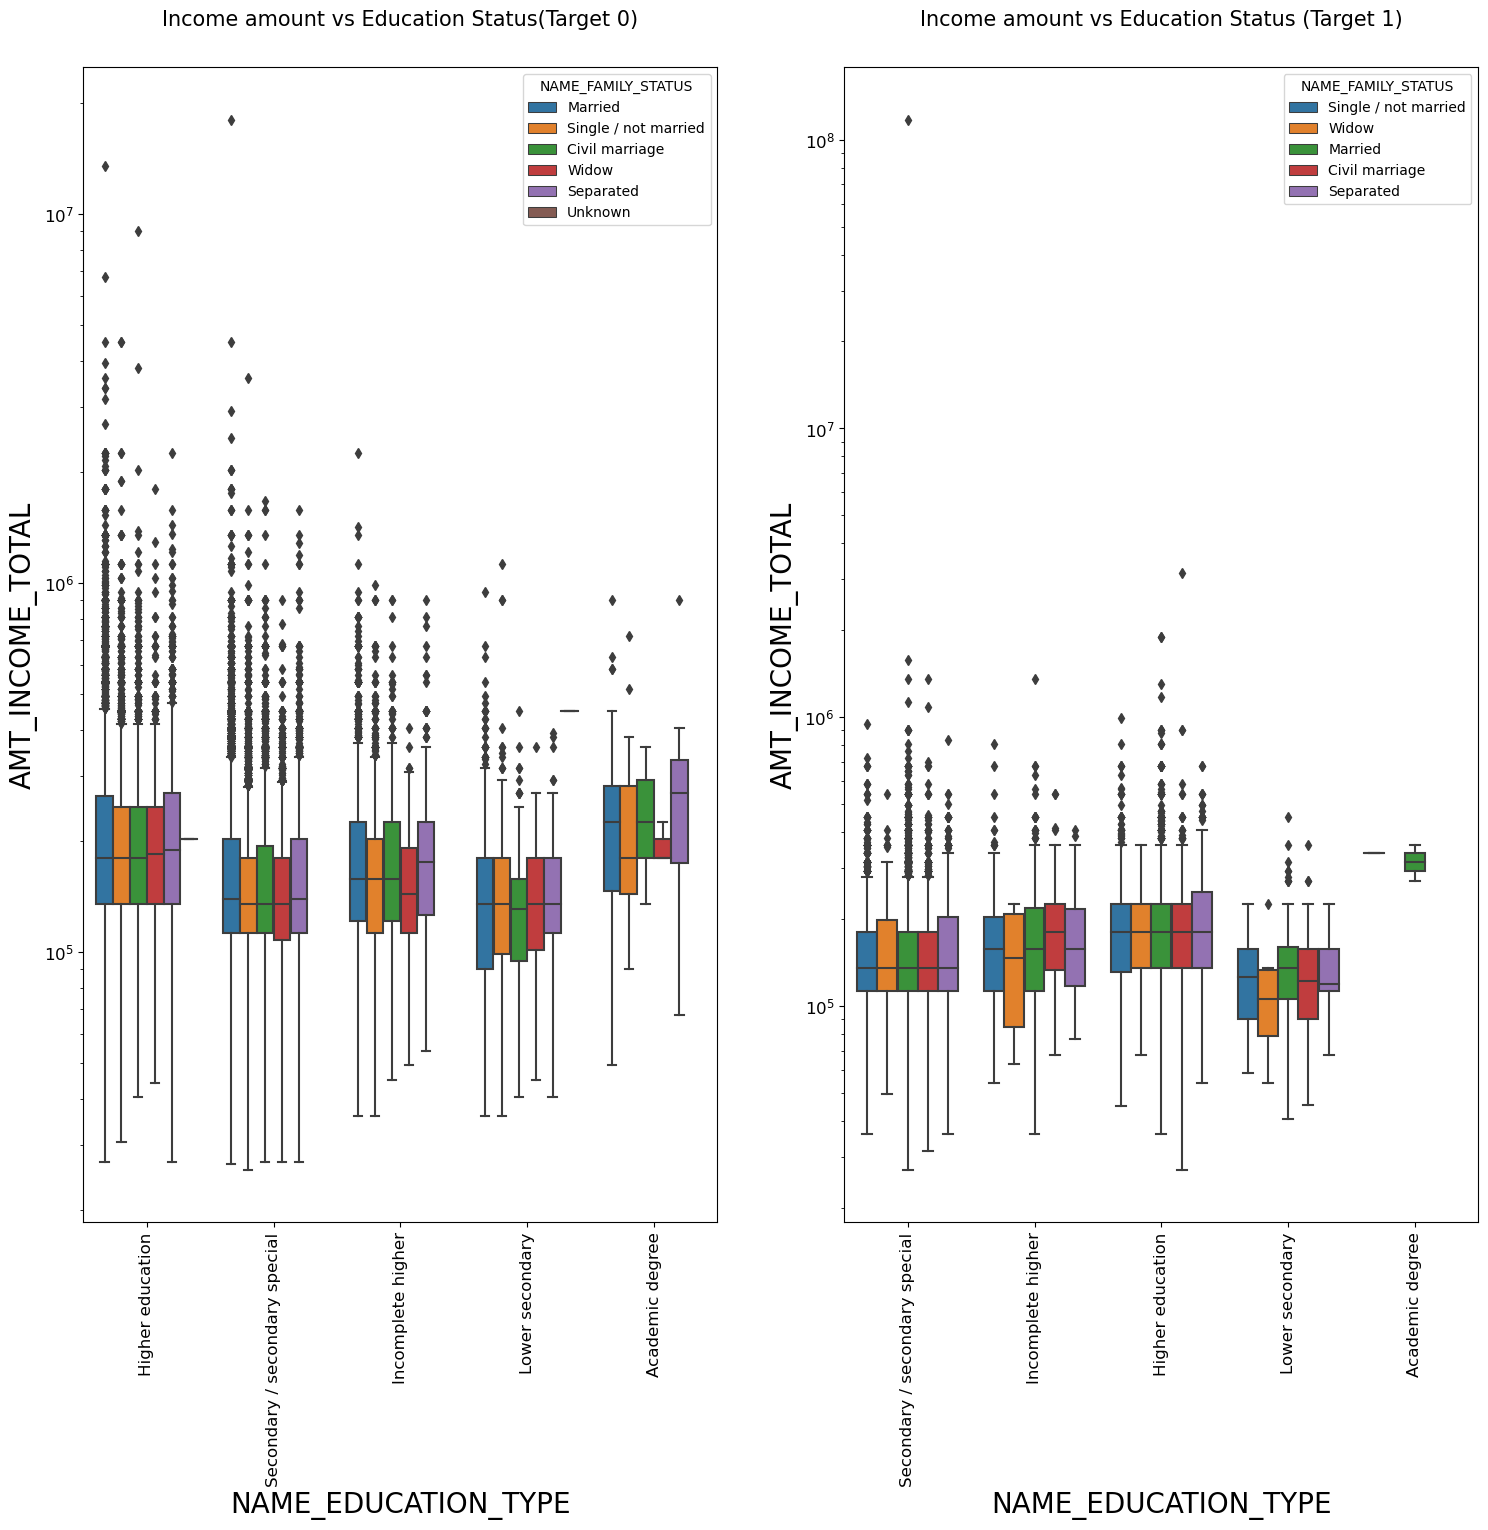

In [101]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(18,15))
plt.subplot(1,2,1)
plt.yscale('log')
sns.boxplot(data =target_0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status(Target 0)')
plt.xticks(rotation=90)



plt.subplot(1,2,2)
plt.yscale('log')
sns.boxplot(data =target_1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status (Target 1)')
plt.xticks(rotation=90)
plt.show()

###### From the above plots,
1. We can see that Higher education has many outliers.
2. People with higher educataion have higher income and dont have difficulties in making loan payment.
3. People with higher education who has lesser income are unable to pay the loan.

Hence we can conclude that, people with Higher income are most likely to make payments.

#### Workiking with previous_application.csv

In [102]:
inp1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
inp1.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [104]:
inp1.NAME_CASH_LOAN_PURPOSE.head()

0        XAP
1        XNA
2        XNA
3        XNA
4    Repairs
Name: NAME_CASH_LOAN_PURPOSE, dtype: object

In [105]:
# Removing the column values of 'XNA' and 'XAP'

inp1=inp1.drop(inp1[inp1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)

inp1=inp1.drop(inp1[inp1['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

In [106]:
inp1.NAME_CASH_LOAN_PURPOSE.value_counts()

Repairs                             23765
Other                               15608
Urgent needs                         8412
Buying a used car                    2888
Building a house or an annex         2693
Everyday expenses                    2416
Medicine                             2174
Payments on other loans              1931
Education                            1573
Journey                              1239
Purchase of electronic equipment     1061
Buying a new car                     1012
Wedding / gift / holiday              962
Buying a home                         865
Car repairs                           797
Furniture                             749
Buying a holiday home / land          533
Business development                  426
Gasification / water supply           300
Buying a garage                       136
Hobby                                  55
Money for a third person               25
Refusal to name the goal               15
Name: NAME_CASH_LOAN_PURPOSE, dtyp

In [107]:
#Merge the previous application with the current application data file
merged_inp= pd.merge(inp0, inp1, how='inner', on='SK_ID_CURR',suffixes='_x')
merged_inp.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,...,XNA,6.0,high,Cash Street: high,365243.0,-569.0,-419.0,-449.0,-443.0,1.0
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,...,XNA,60.0,low_action,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,...,XNA,42.0,low_normal,Cash Street: low,365243.0,-665.0,565.0,-455.0,-446.0,1.0
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,XNA,18.0,low_normal,Cash Street: low,365243.0,-509.0,1.0,365243.0,365243.0,1.0
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,XNA,24.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
merged_inp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51420 entries, 0 to 51419
Data columns (total 67 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   SK_ID_CURR                   51420 non-null  int64   
 1   TARGET                       51420 non-null  int64   
 2   NAME_CONTRACT_TYPE_          51420 non-null  object  
 3   CODE_GENDER                  51420 non-null  object  
 4   FLAG_OWN_CAR                 51420 non-null  object  
 5   FLAG_OWN_REALTY              51420 non-null  object  
 6   CNT_CHILDREN                 51420 non-null  int64   
 7   AMT_INCOME_TOTAL             51420 non-null  float64 
 8   AMT_CREDIT_                  51420 non-null  float64 
 9   AMT_ANNUITY_                 51420 non-null  float64 
 10  NAME_INCOME_TYPE             51420 non-null  object  
 11  NAME_EDUCATION_TYPE          51420 non-null  object  
 12  NAME_FAMILY_STATUS           51420 non-null  object  
 13  N

In [109]:
# Renaming the column names after merging

inp = merged_inp.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)
inp.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,...,XNA,6.0,high,Cash Street: high,365243.0,-569.0,-419.0,-449.0,-443.0,1.0
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,...,XNA,60.0,low_action,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,...,XNA,42.0,low_normal,Cash Street: low,365243.0,-665.0,565.0,-455.0,-446.0,1.0
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,XNA,18.0,low_normal,Cash Street: low,365243.0,-509.0,1.0,365243.0,365243.0,1.0
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,XNA,24.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
# Removing unwanted columns for analysis

inp.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

inp.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,Working,...,XNA,6.0,high,Cash Street: high,365243.0,-569.0,-419.0,-449.0,-443.0,1.0
1,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,Commercial associate,...,XNA,60.0,low_action,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
2,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,Commercial associate,...,XNA,42.0,low_normal,Cash Street: low,365243.0,-665.0,565.0,-455.0,-446.0,1.0
3,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,Working,...,XNA,18.0,low_normal,Cash Street: low,365243.0,-509.0,1.0,365243.0,365243.0,1.0
4,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,Working,...,XNA,24.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
inp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51420 entries, 0 to 51419
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   TARGET                      51420 non-null  int64   
 1   NAME_CONTRACT_TYPE          51420 non-null  object  
 2   CODE_GENDER                 51420 non-null  object  
 3   FLAG_OWN_CAR                51420 non-null  object  
 4   FLAG_OWN_REALTY             51420 non-null  object  
 5   CNT_CHILDREN                51420 non-null  int64   
 6   AMT_INCOME_TOTAL            51420 non-null  float64 
 7   AMT_CREDIT                  51420 non-null  float64 
 8   AMT_ANNUITY                 51420 non-null  float64 
 9   NAME_INCOME_TYPE            51420 non-null  object  
 10  NAME_EDUCATION_TYPE         51420 non-null  object  
 11  NAME_FAMILY_STATUS          51420 non-null  object  
 12  NAME_HOUSING_TYPE           51420 non-null  object  
 13  REGION_POPULATIO

###### Univariate Analysis


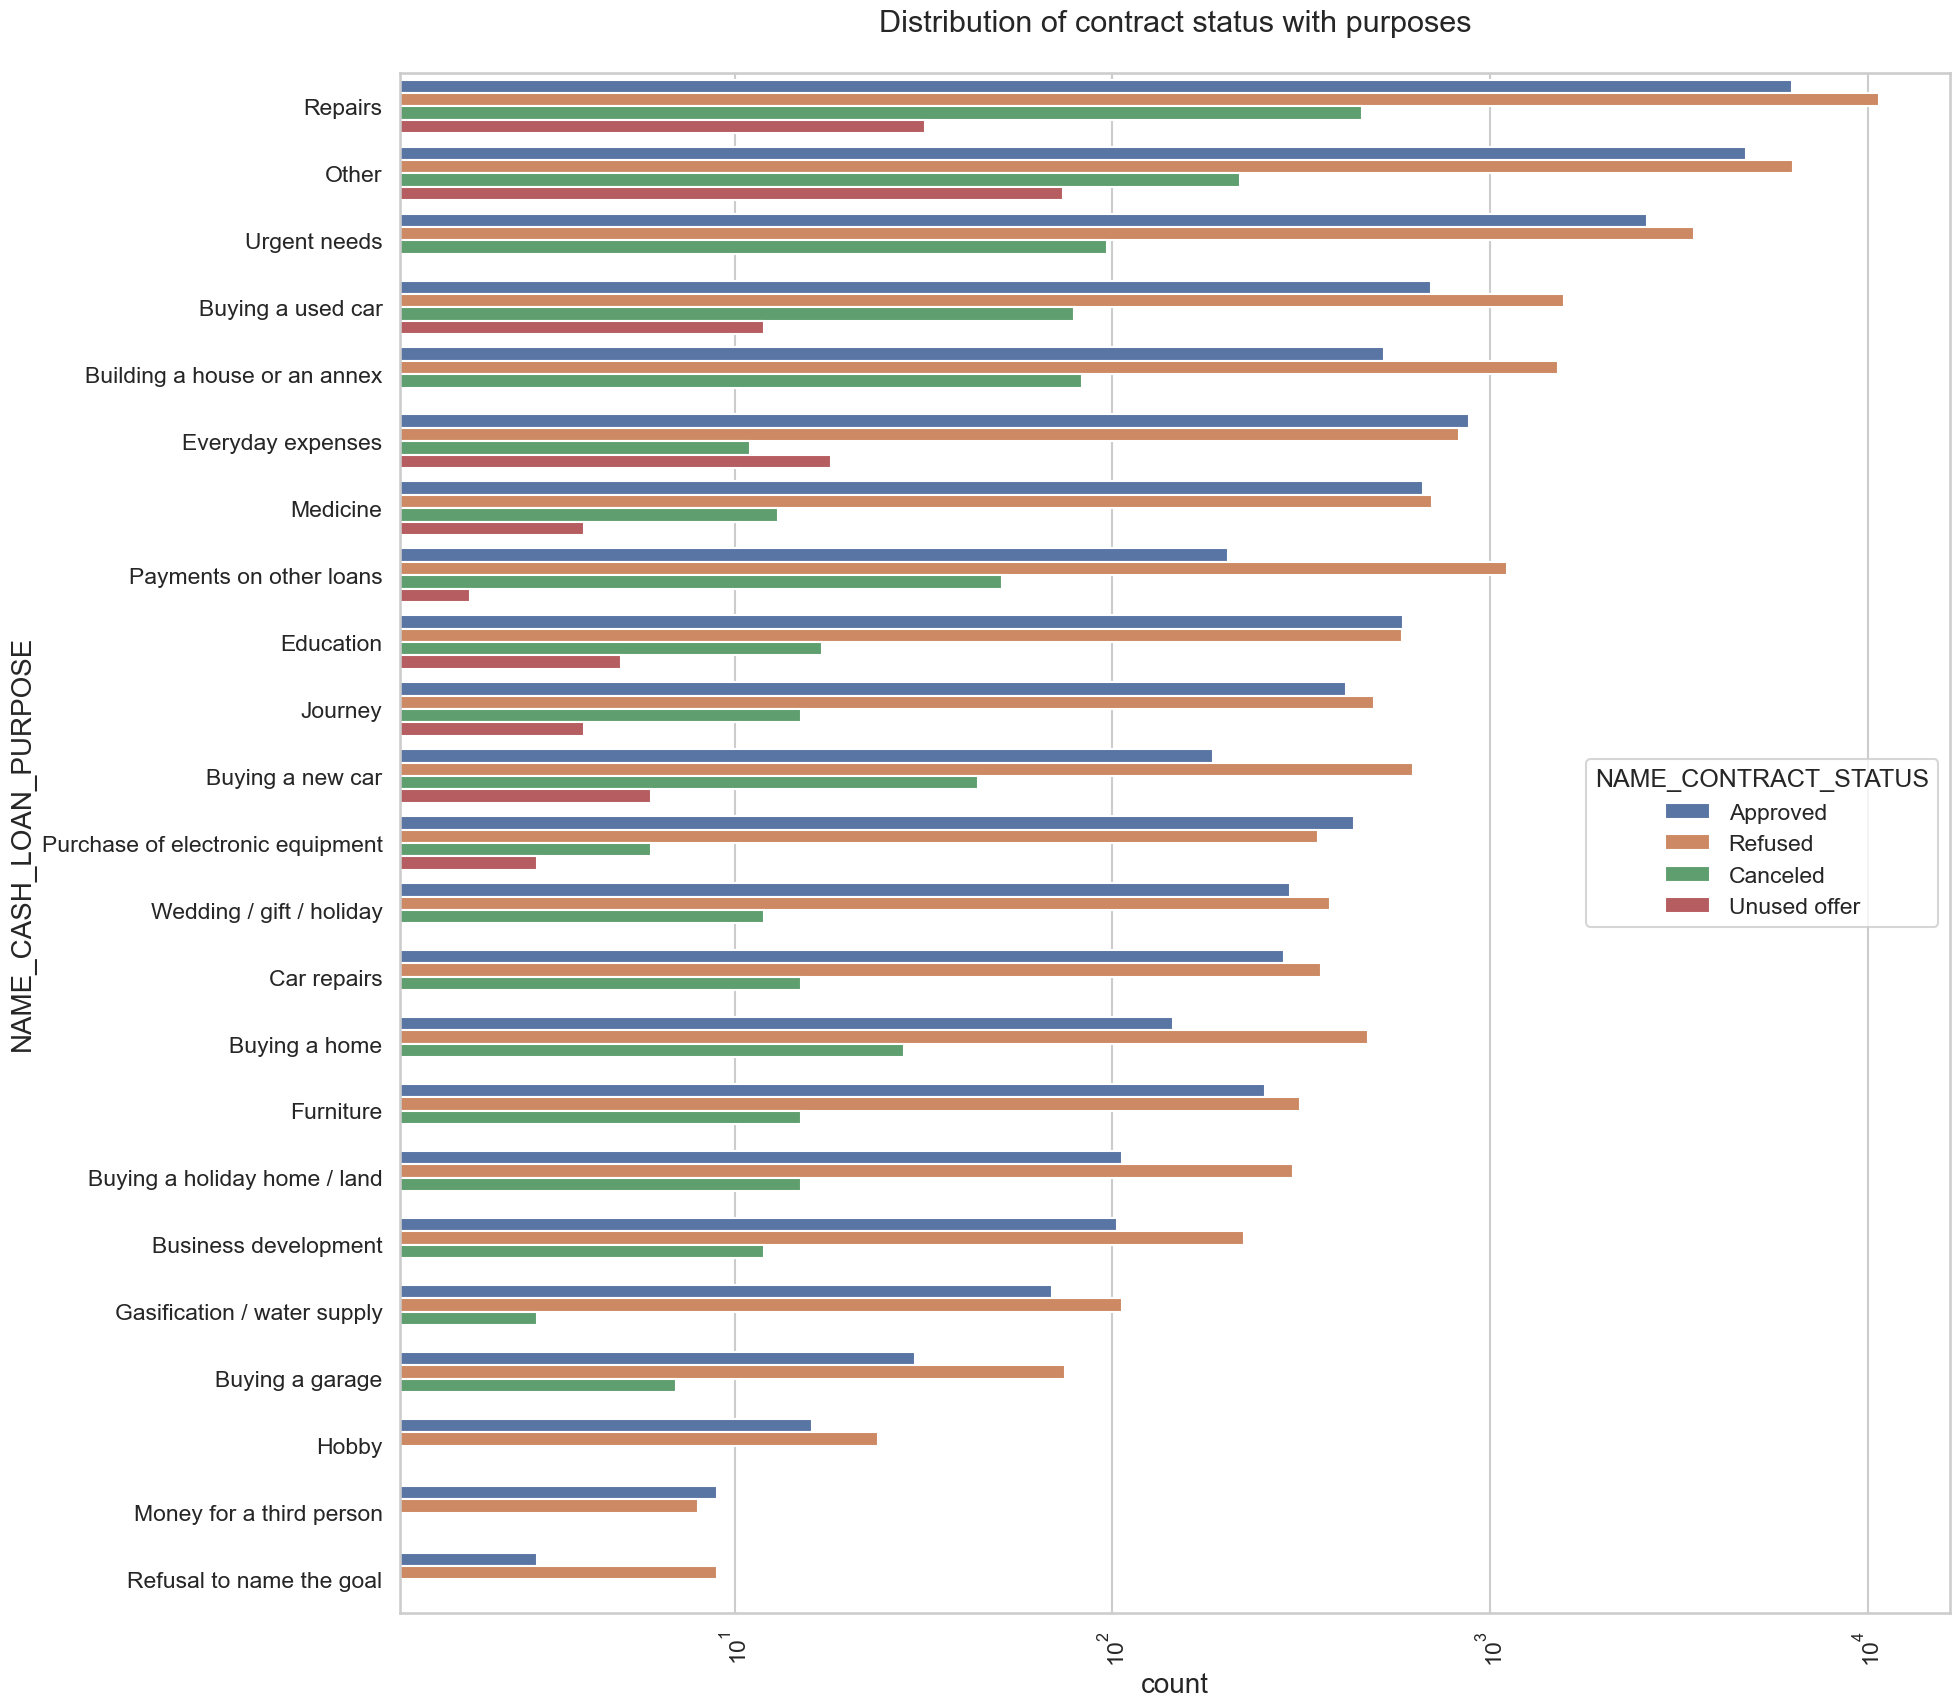

In [112]:
# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(20,20))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax=sns.countplot(data = inp, y='NAME_CASH_LOAN_PURPOSE', order=inp['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='deep')




##### Points to be concluded from above plot:
1. Most rejection of loans came from purpose 'Repairs'. 
2. For education purposes we have equal number of approves and rejection PayinG other loans and buying a new car is having significant higher rejection than approves.

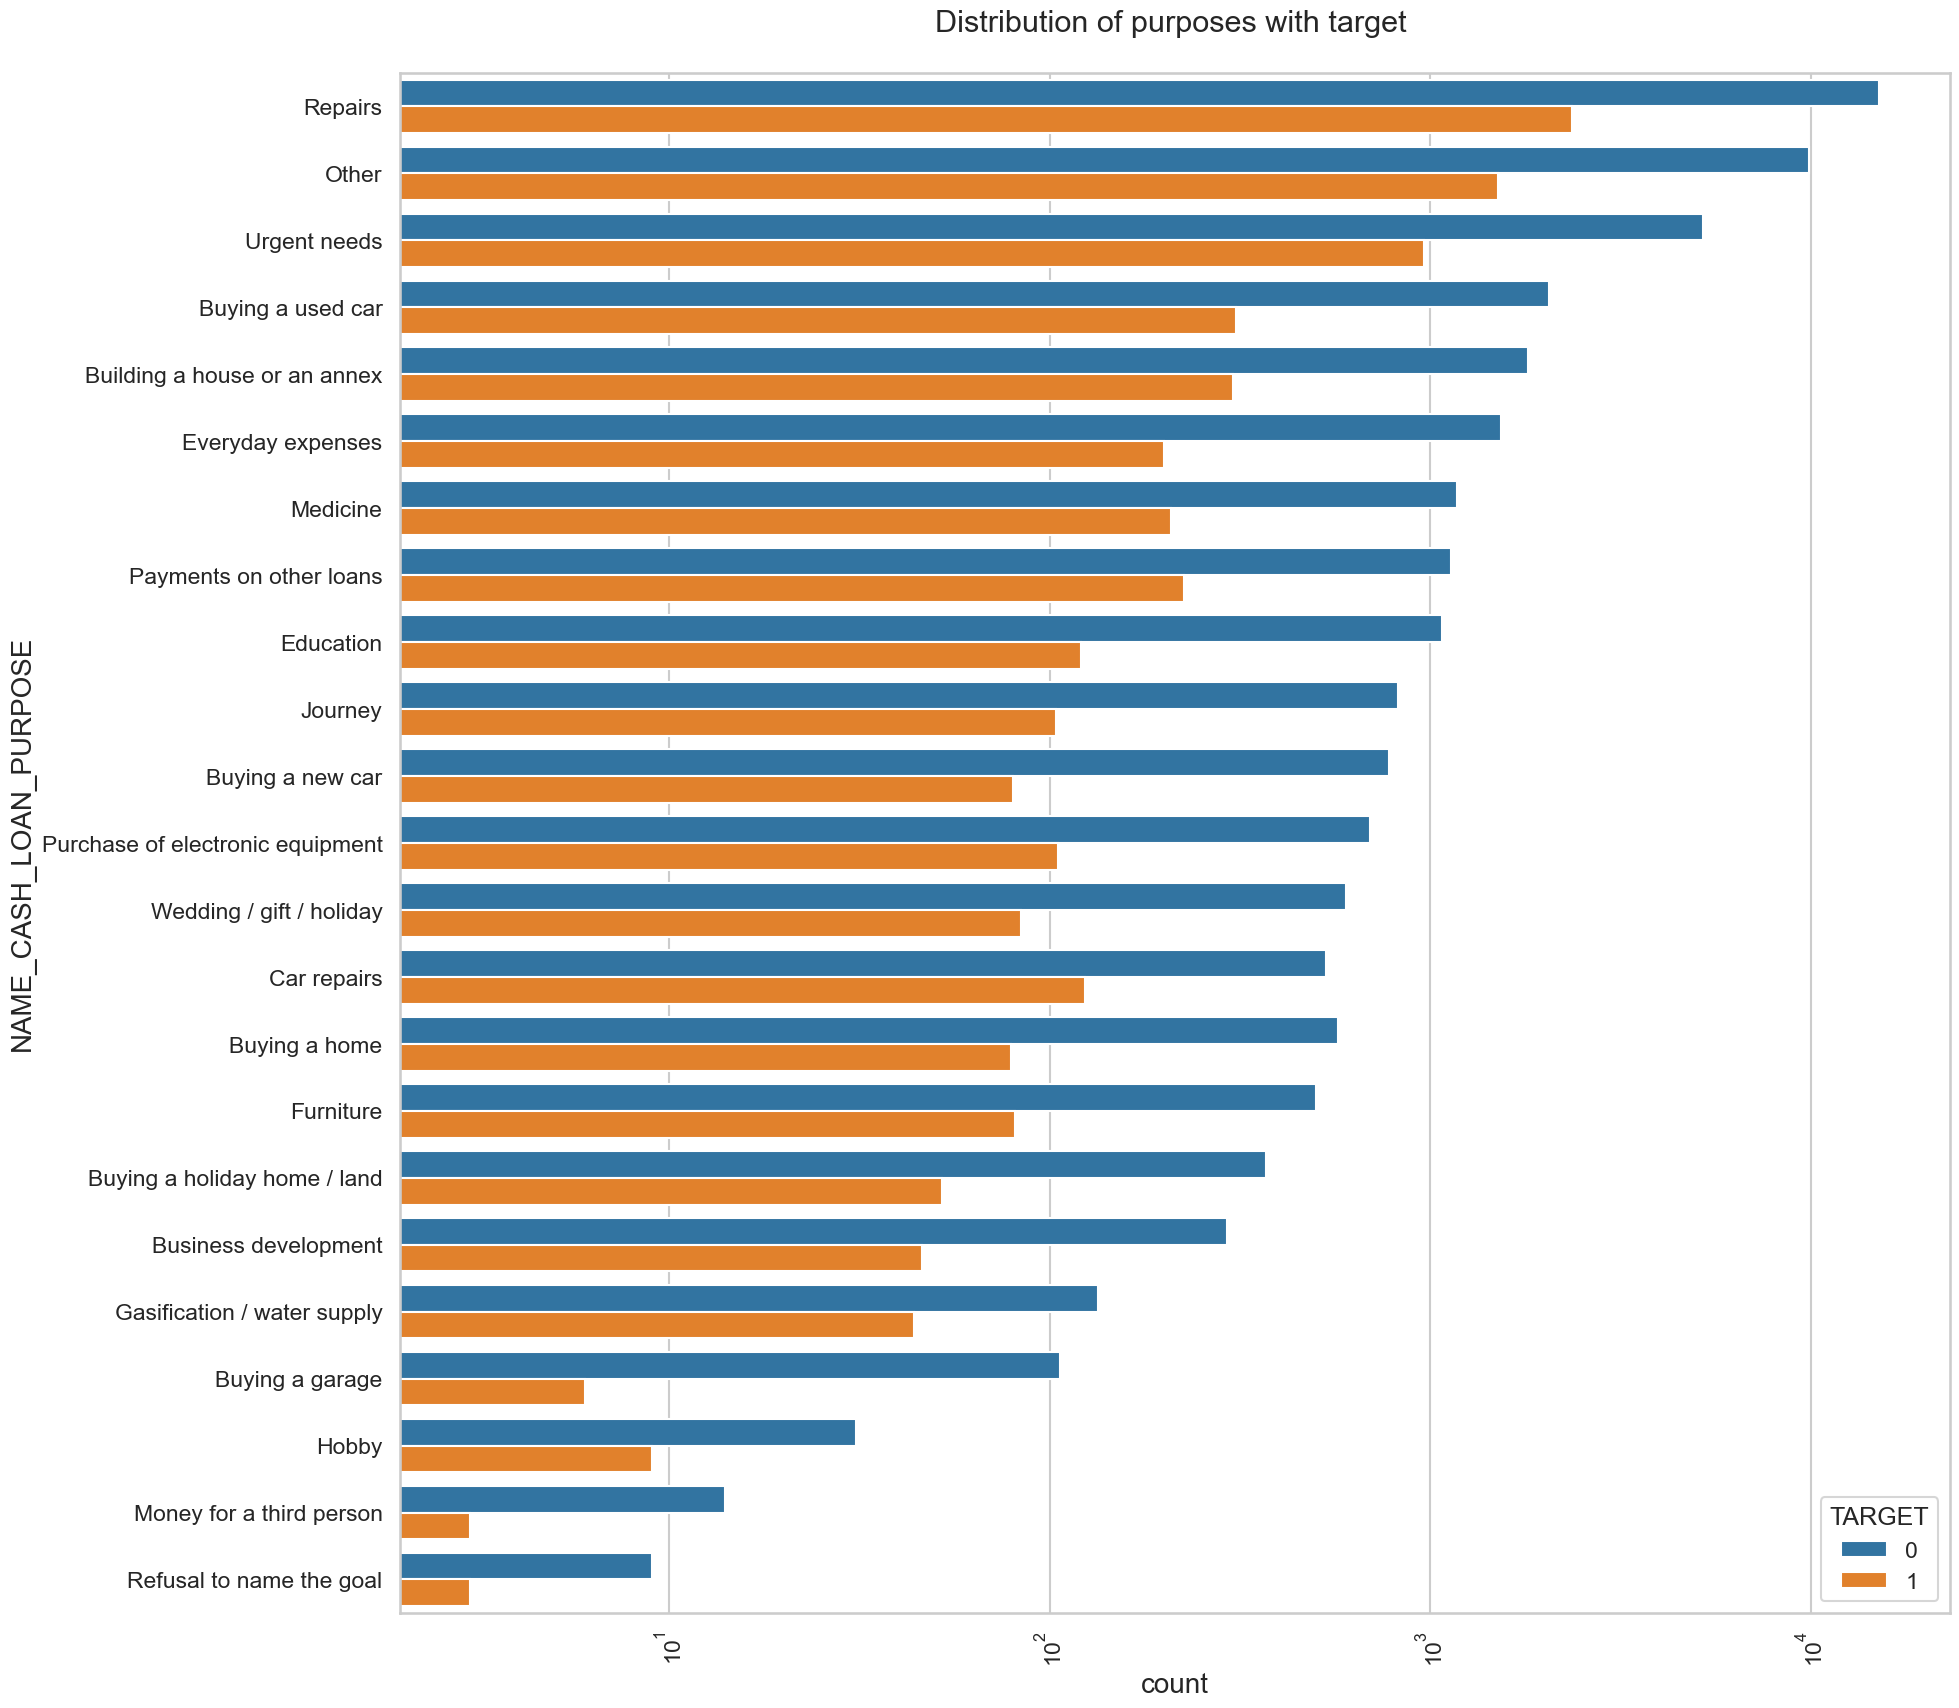

In [113]:
# Distribution of contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(20,20))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = inp, y= 'NAME_CASH_LOAN_PURPOSE', order=inp['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET')



###### Points to be concluded from above plot:
1. Loan purposes with 'Repairs' are facing more difficulties in payment on time. 
2. There are few places where loan payment is significant higher than facing difficulties. They are 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education' Hence we can focus on these purposes for which the client is having for minimal payment difficulties

#### Bivariate Analysis

##### Prev Credit amount vs Loan Purpose

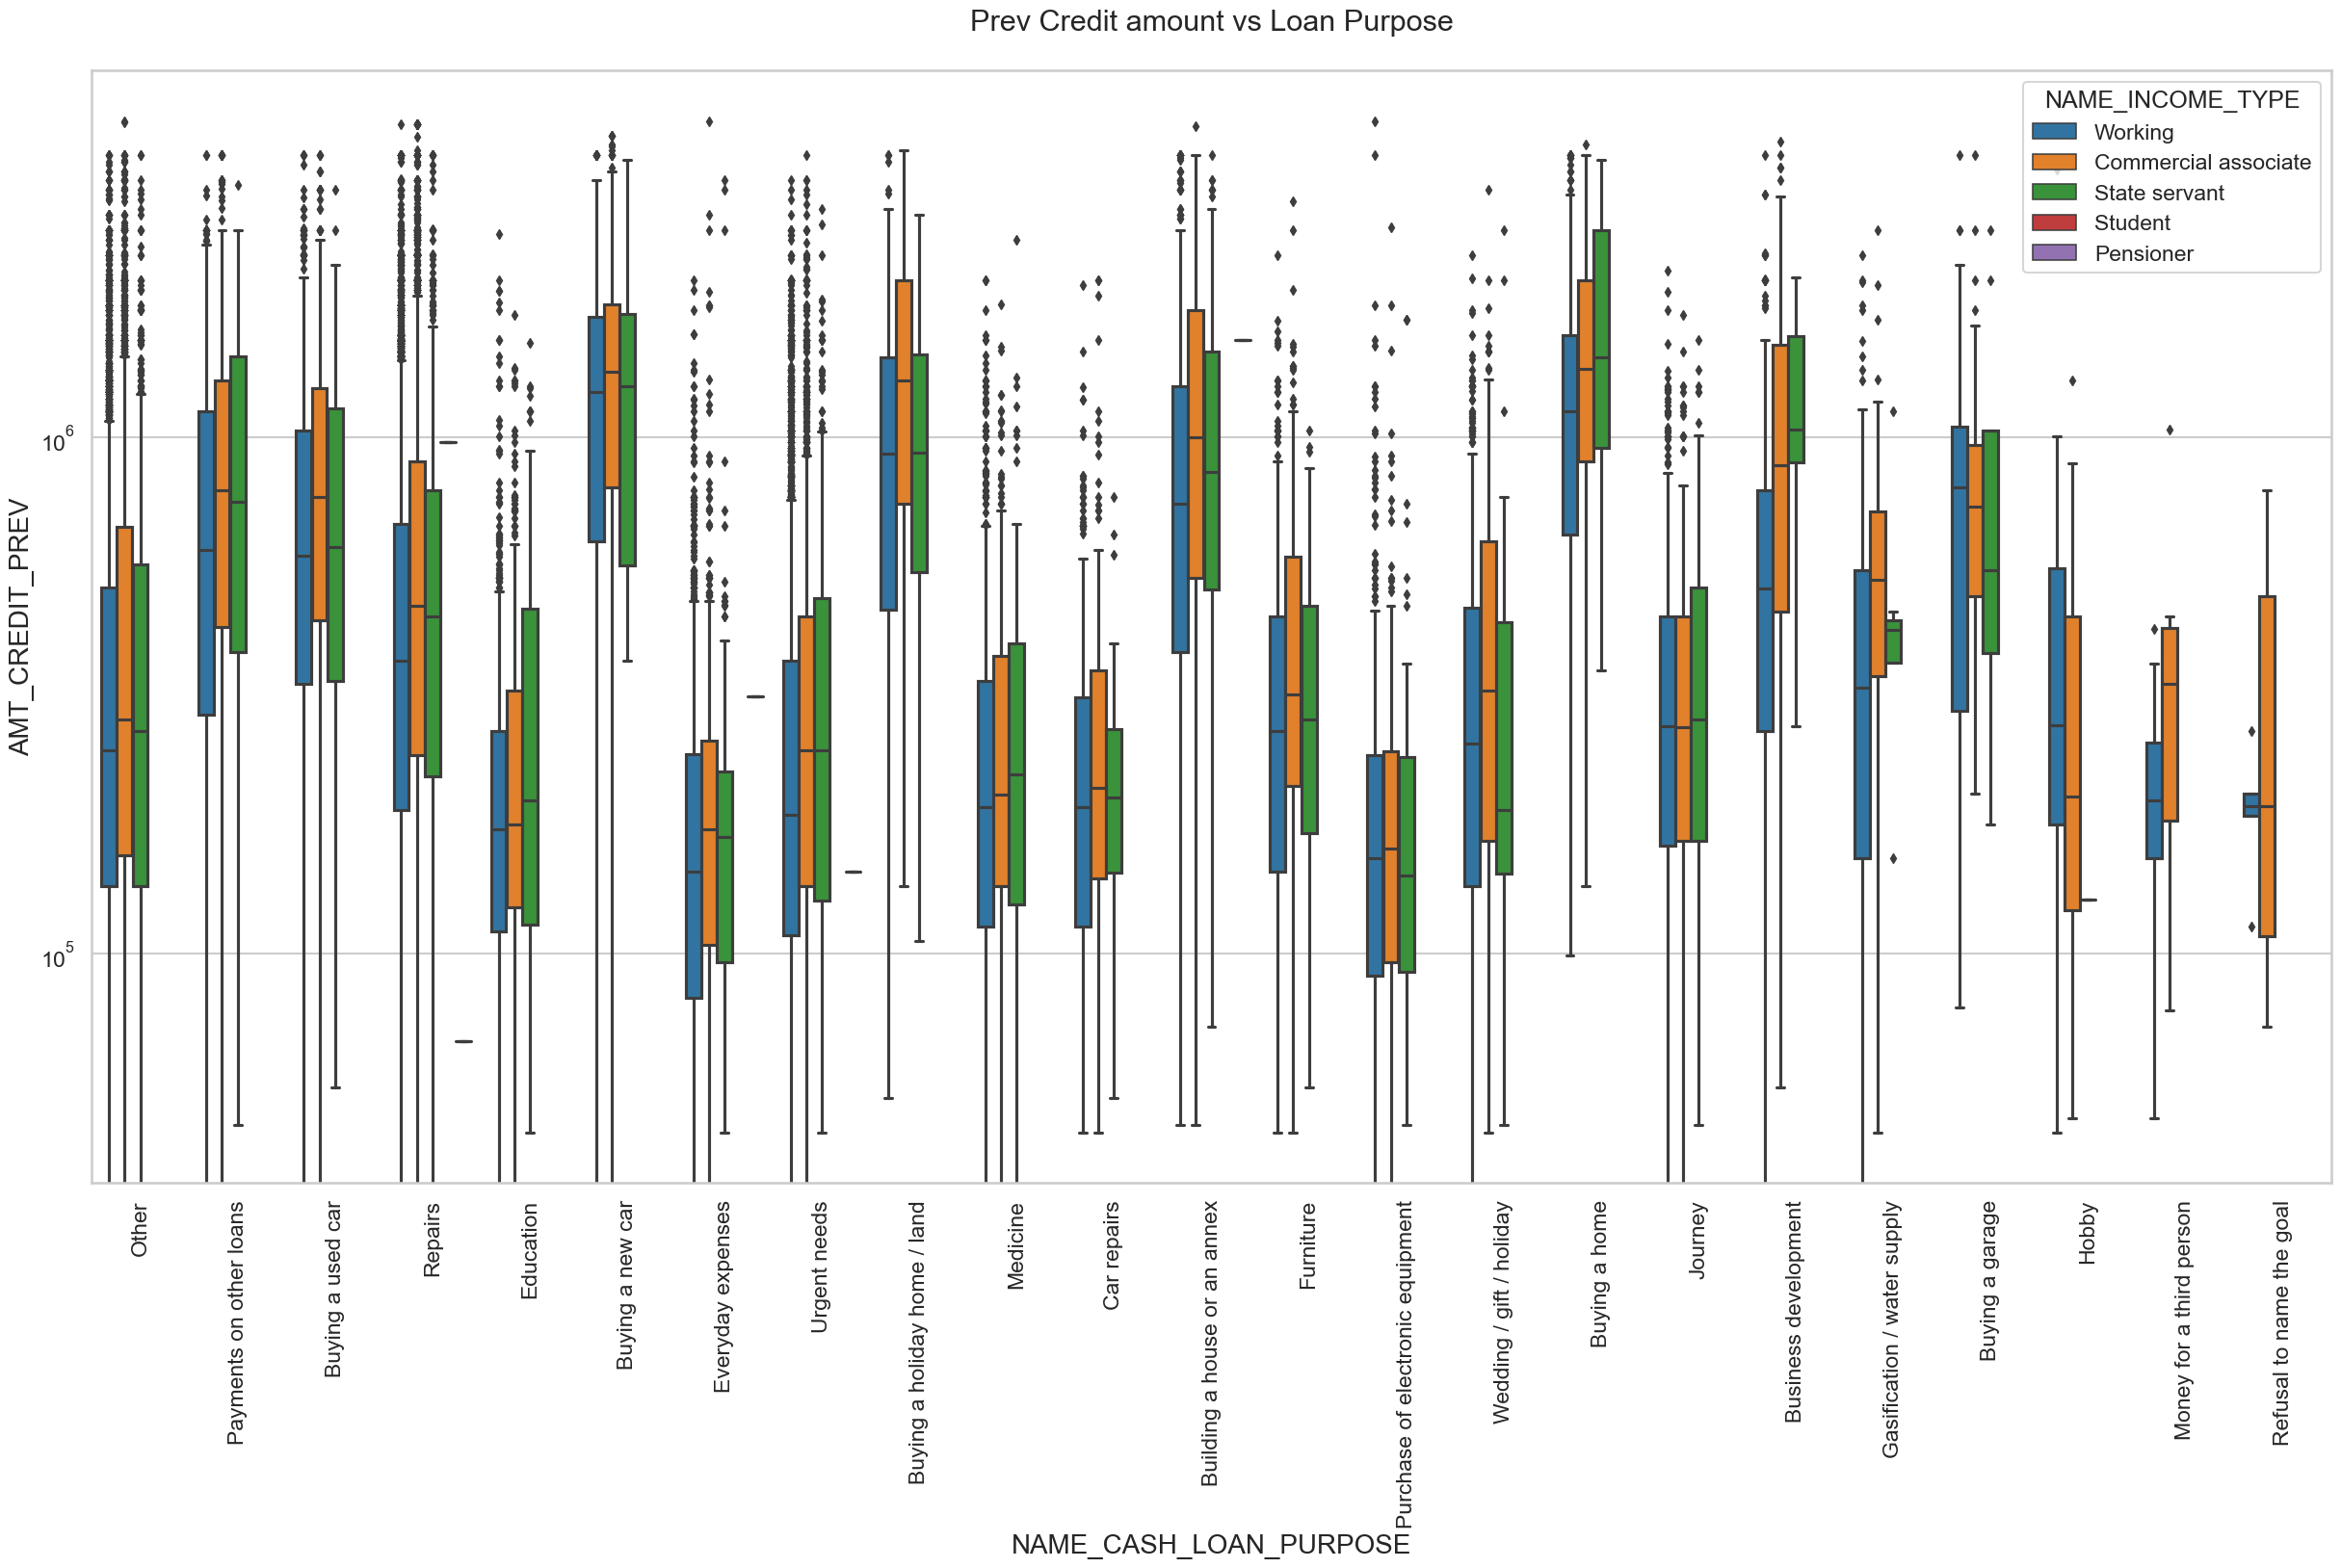

In [114]:
# Box plotting for Credit amount in logarithmic scale

plt.figure(figsize=(30,15))
plt.xticks(rotation=90)
plt.yscale('log')

sns.boxplot(data =inp, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

From the above we can conclude some points: 

1. The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and 'Building a house' is higher. 

2. Income type of state servants have a significant amount of credit applied.

3. Money for third person or a Hobby is having less credits applied for.

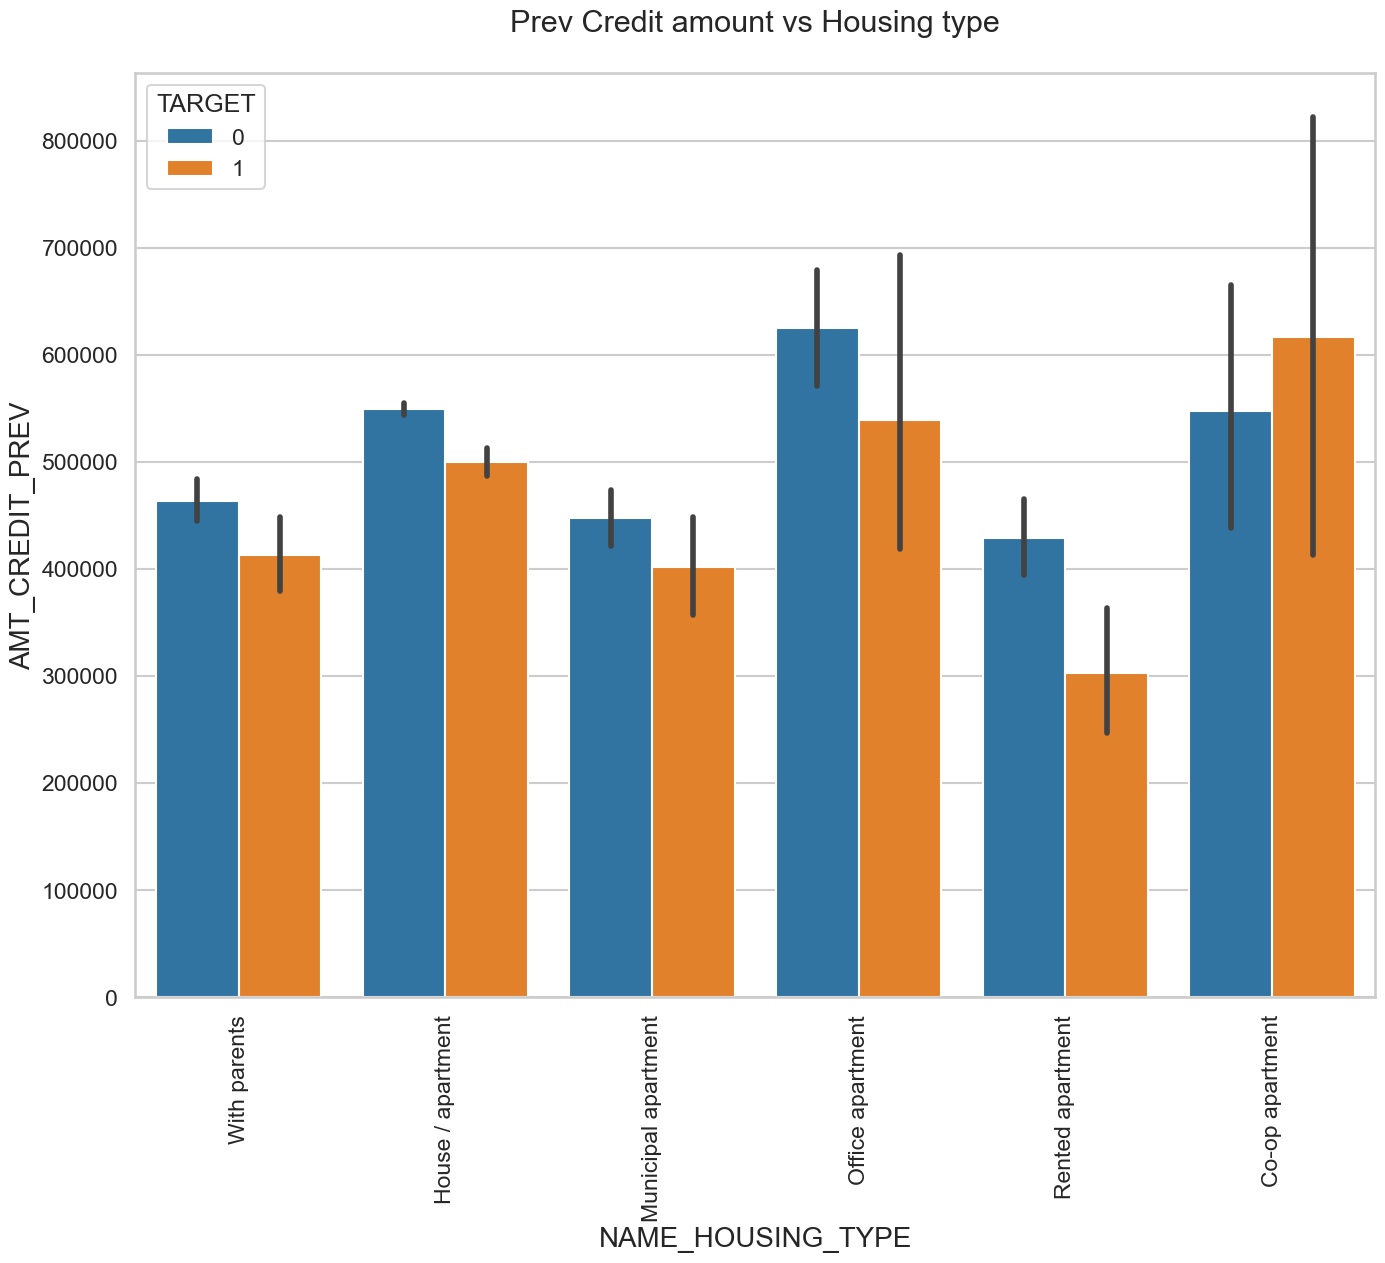

In [115]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =inp, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

Here for Housing type, office apartment is having higher credit of target 0 and co-op apartment is 
having higher credit of target 1. So, we can conclude  that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment. Bank can focus mostly on housing type with parents or House\apartment or municipal apartment for successful payments.

# Conclusion:


#### 1. Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for successful payments.

#### 2. Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.

#### 3. Also with loan purpose ‘Repair’ is having higher number of unsuccessful payments on time.

#### 4. Get as much as clients from housing type ‘With parents’ as they are having least number of unsuccessful payments.